In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Data Load
- 'PL04496-03040' (prod_list[0]) 제품만을 대상으로
- 정상 데이터만으로 학습
- 전체 데이터로 테스트

In [3]:
isee_machine = pd.read_csv('./data/isee_machine_middle_NG_inter_MapNorm_combined_label.csv')
prod_list = isee_machine.ProductNum.unique()

# prod_list[0] 제품에 대해서만 분석
isee_machine = isee_machine[isee_machine.ProductNum == prod_list[0]]    

analy_col = ['CycleTime', 'VpPosition', 'VpTime',
        'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
        'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
        'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
        'Zone1', 'Zone2', 'Zone3', 'Zone4'] 
isee_machine['NG_Label'] = isee_machine['NG'] + isee_machine['NG5']

In [107]:
isee_machine.columns

Index(['creationTime', 'ModuleCount', 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4', 'CycleNum', 'creationDate',
       'creationHour', 'YM', 'Operation_label', 'Qua_Match_YN', 'NG', 'NG5',
       'ProductNum', 'K_mahala_label', 'mahala_label', 'lof_label',
       'gmm_label', 'IF_label', 'svm_label', 'combined_label', 'NG_Label'],
      dtype='object')

In [4]:
#isee_machine['creationDate'] = pd.to_datetime(isee_machine['creationDate'])

In [105]:
isee_machine[(isee_machine.combined_label==2)| (isee_machine.combined_label==3)| (isee_machine.combined_label==4)].shape

(4038, 36)

In [156]:
idx_labeled4 = isee_machine[isee_machine['combined_label']>=1].index.tolist()

n = 40
proba = []
ng_list = []

for id in idx_labeled4:
    df = isee_machine.loc[id:id+n-1]
    ng_list.extend(df[df.NG==1].index.tolist())
    temp_df = df.sort_index(ascending=False).reset_index(drop=True)
    proba.append((temp_df['NG'] * temp_df.index/n).sum())
    cnt = cnt + temp_df['NG'].sum()
    
prob_df = pd.concat([pd.DataFrame(idx_labeled4, columns=['idx']),pd.DataFrame(proba, columns=['proba'])],axis=1)
print(len(prob_df[prob_df.proba != 0])/len(prob_df), len(set(ng_list)), isee_machine['NG'].sum())
print(len(set(ng_list))/ isee_machine['NG'].sum())

0.529431290108431 2521 3391
0.7434385137127691


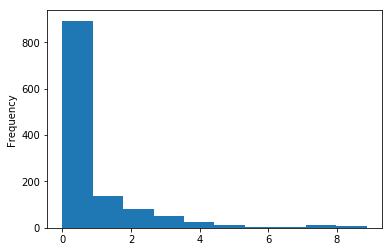

In [114]:
prob_df['proba'].plot(kind='hist')

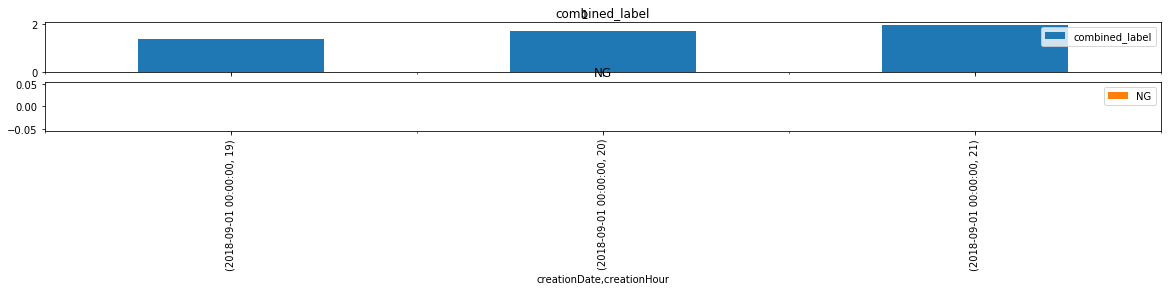

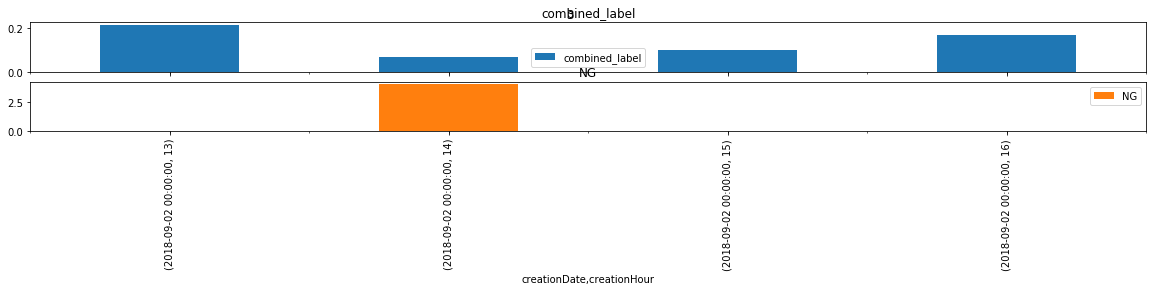

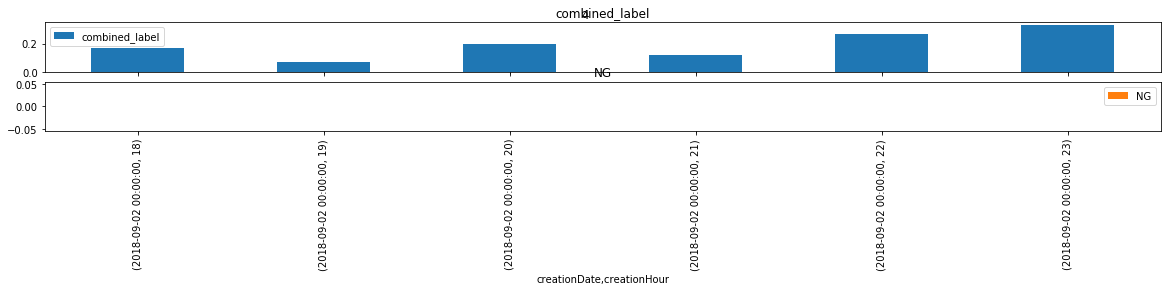

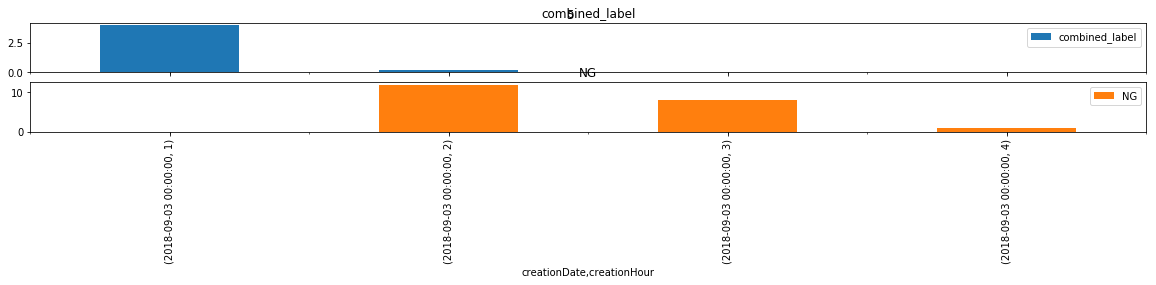

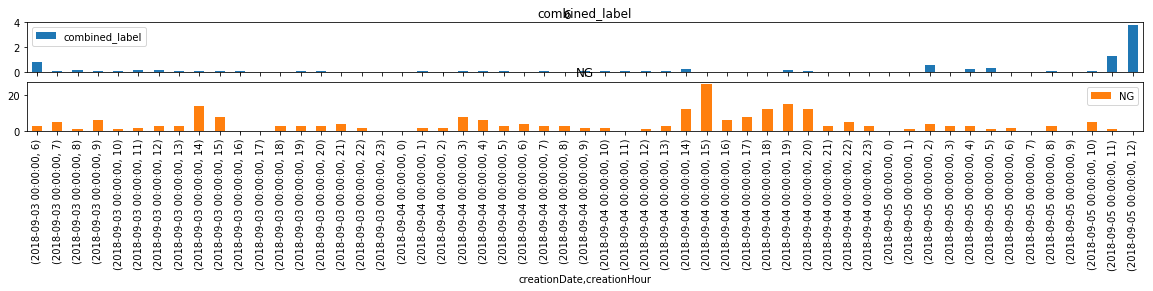

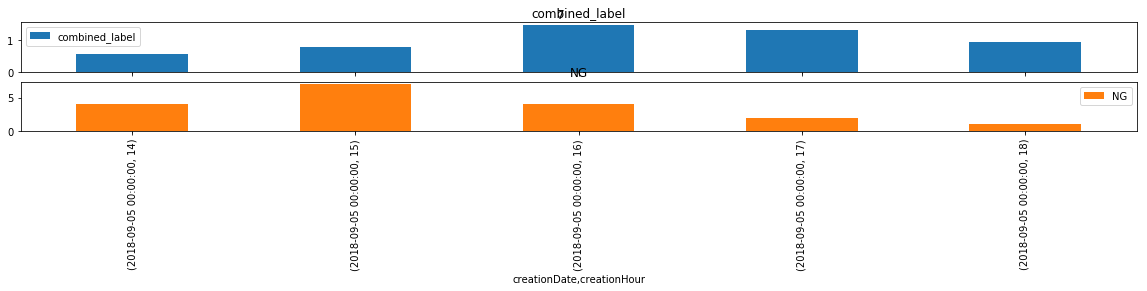

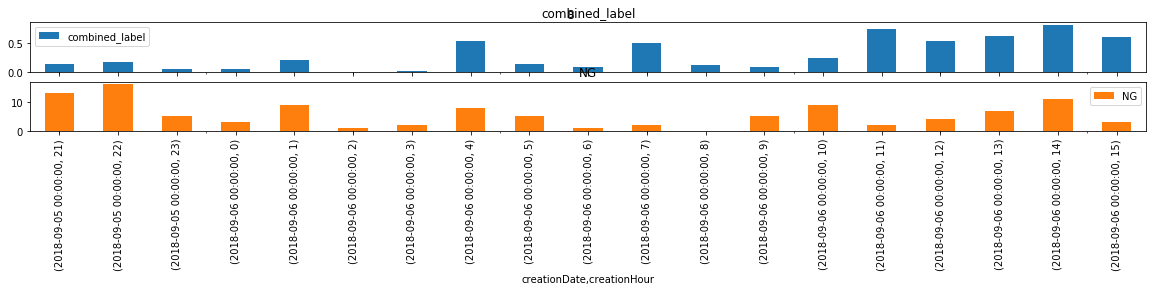

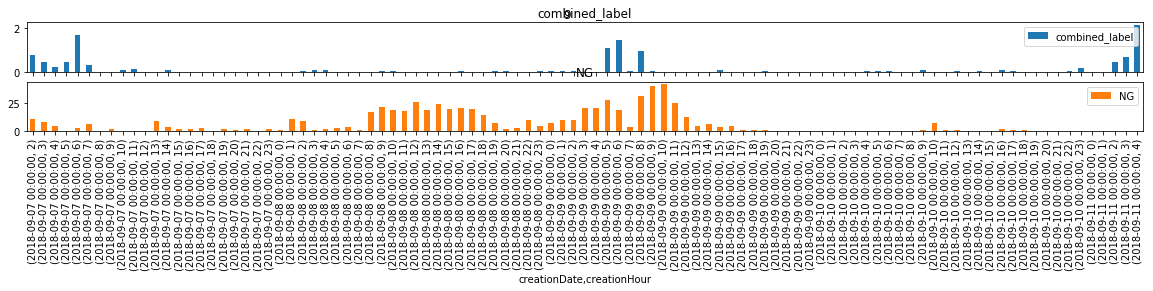

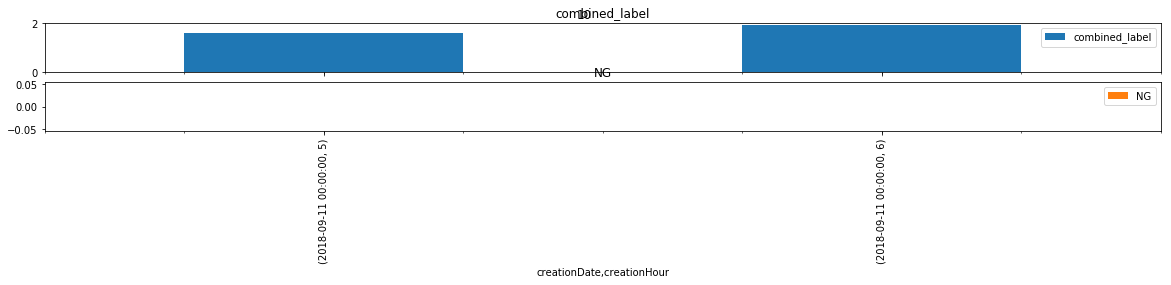

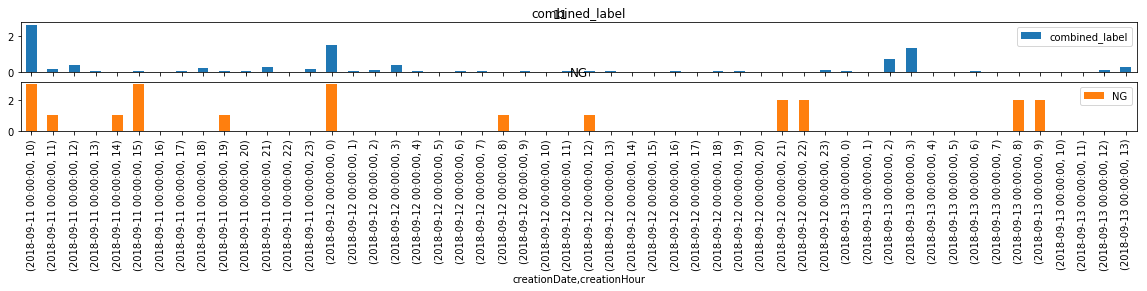

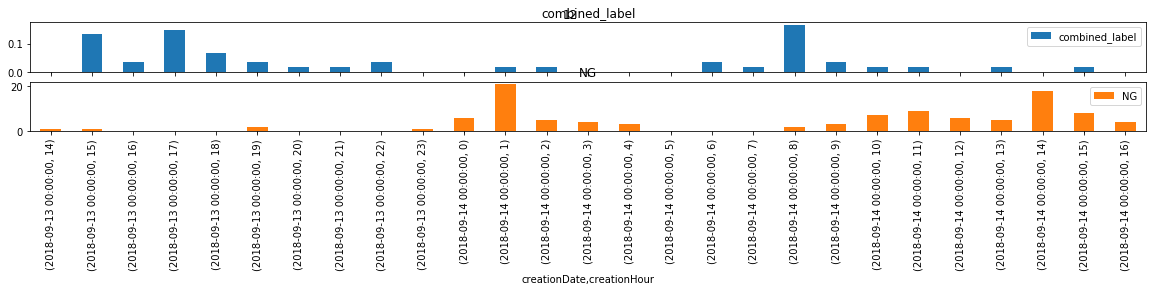

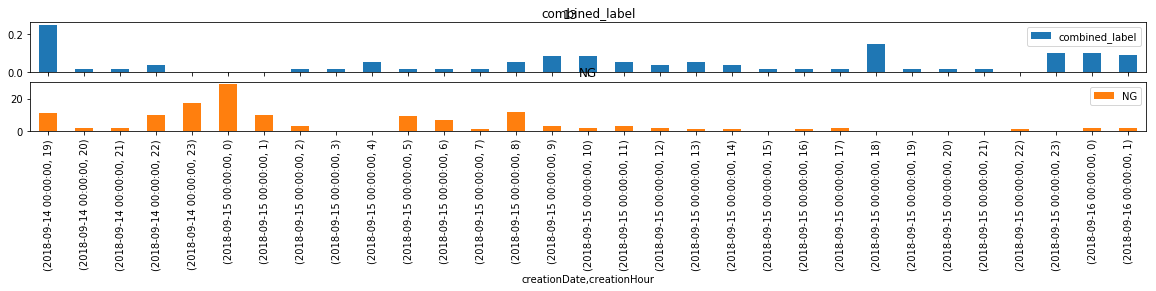

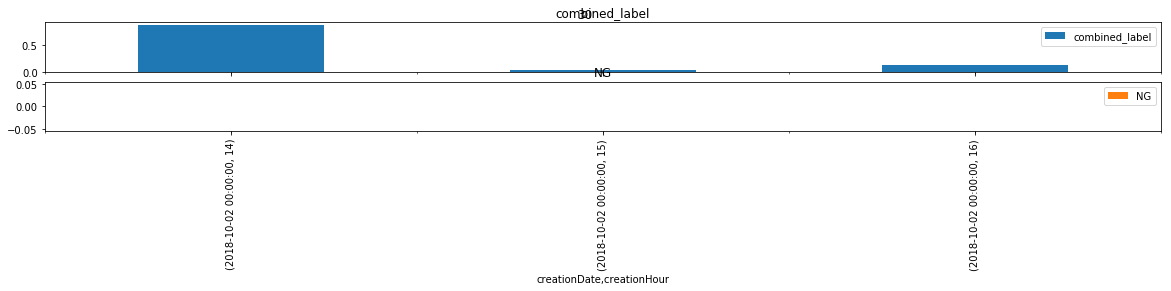

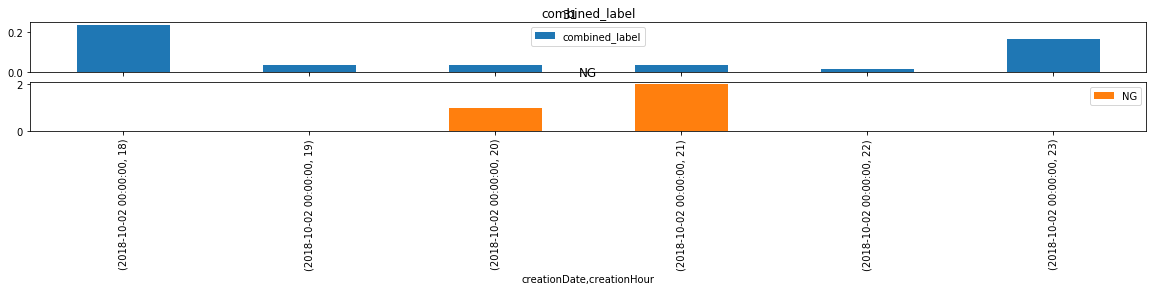

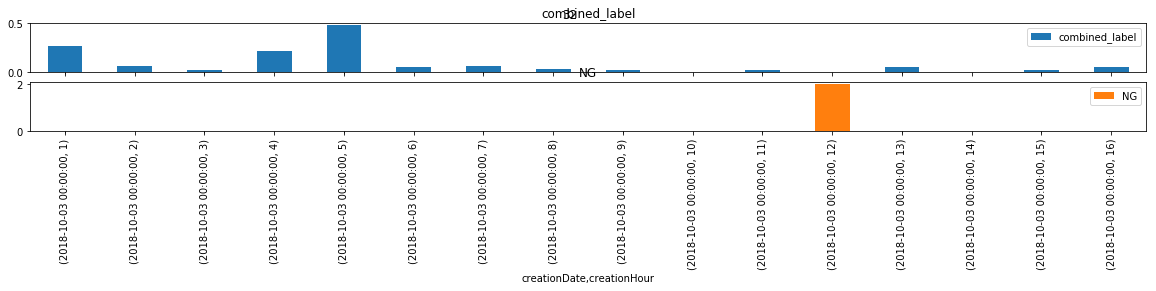

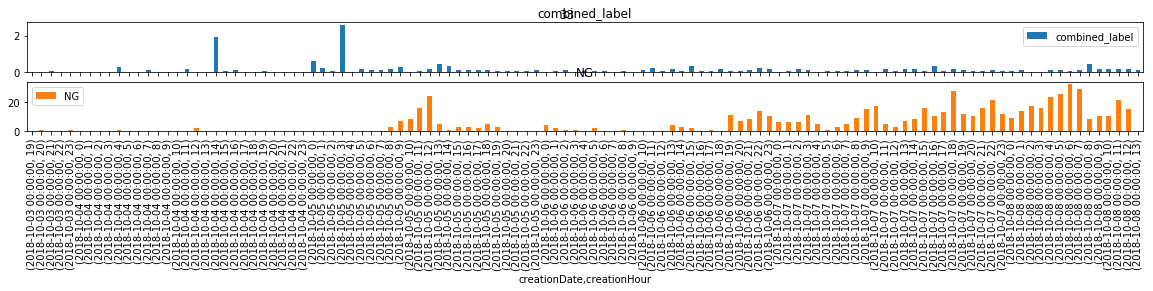

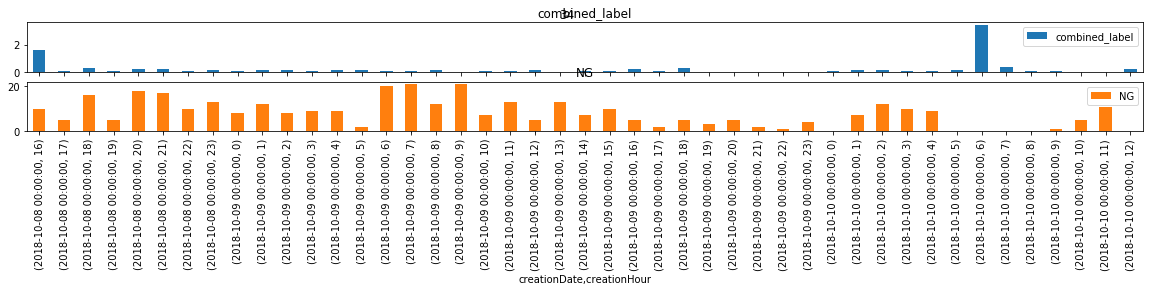

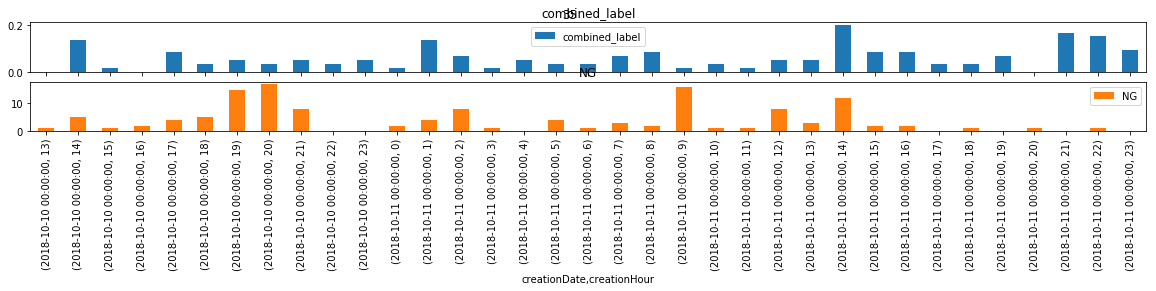

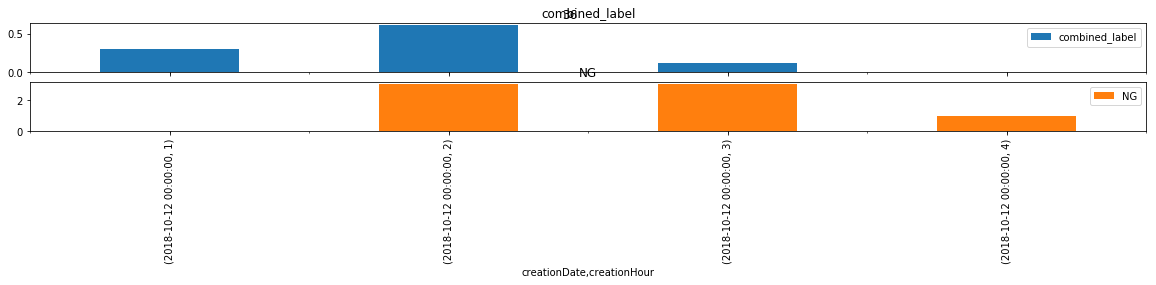

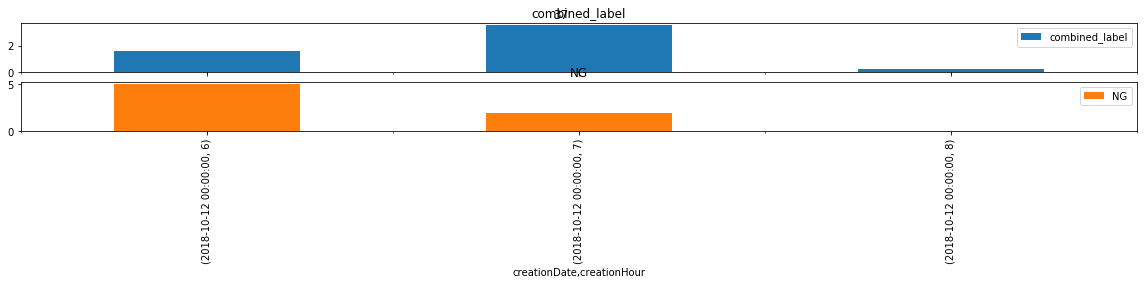

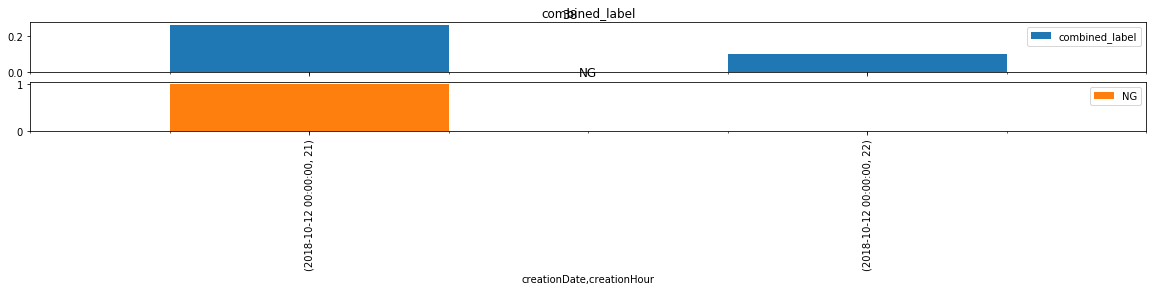

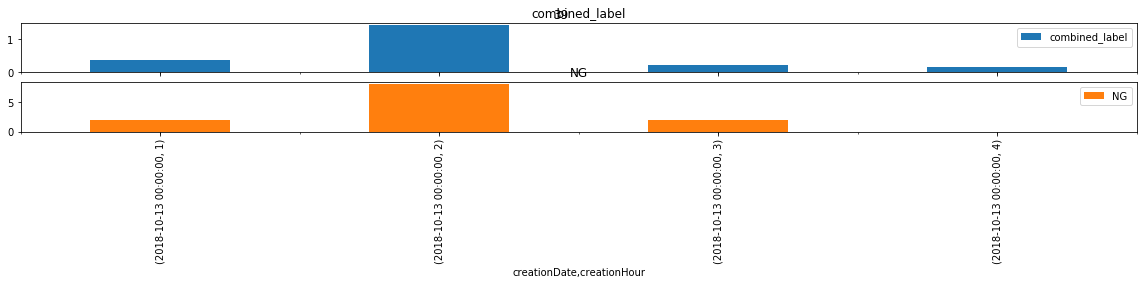

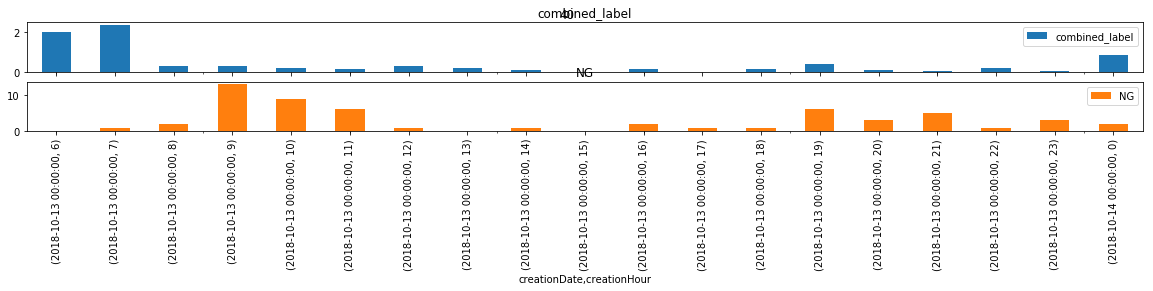

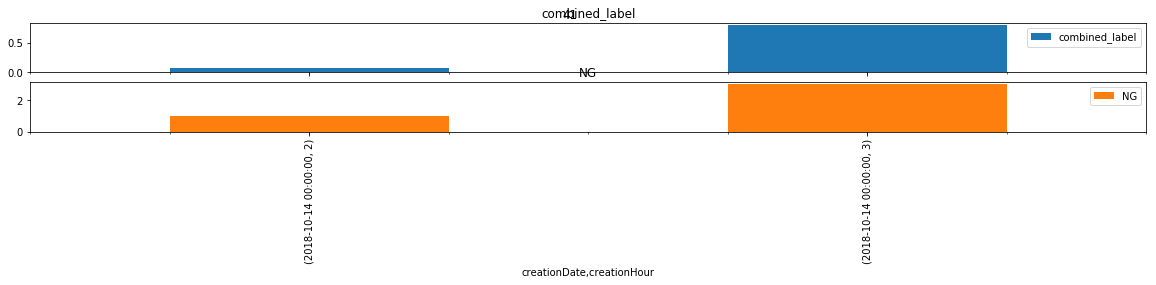

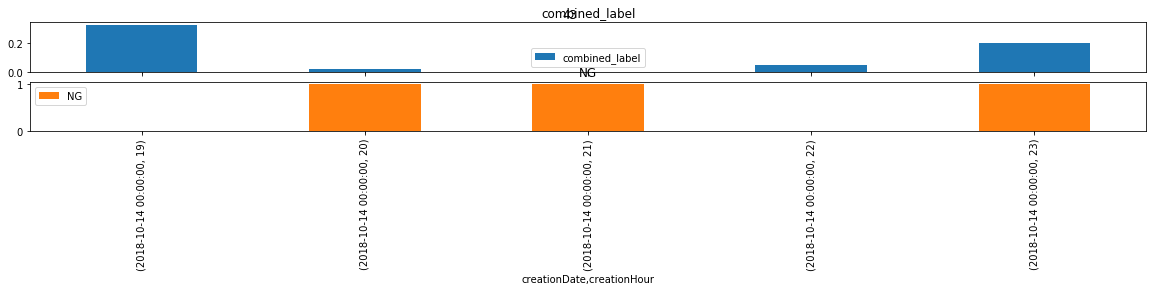

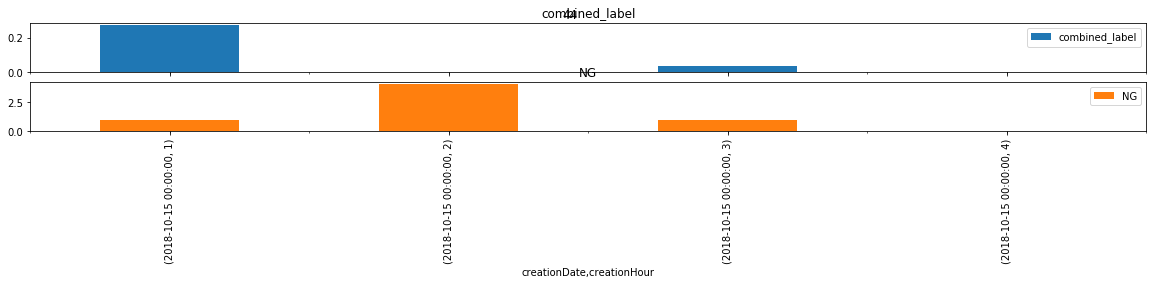

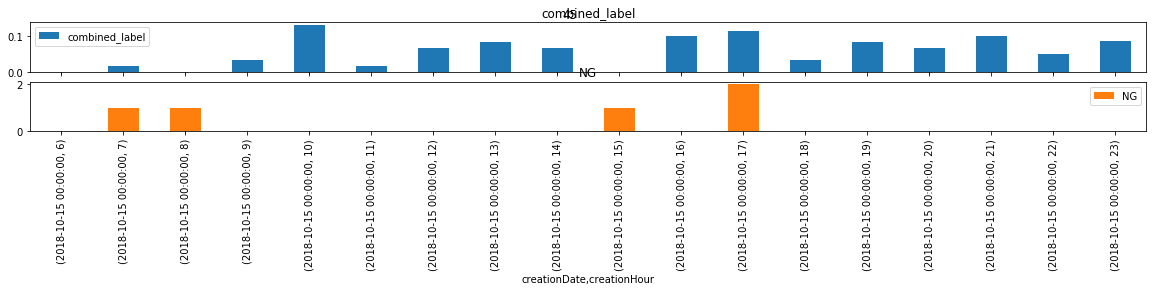

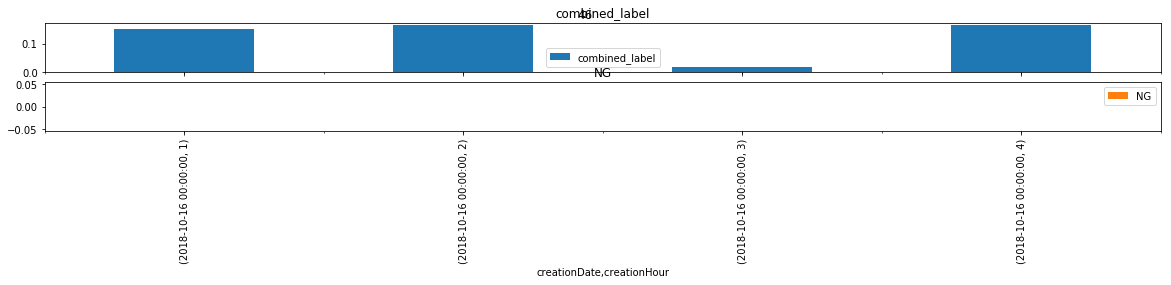

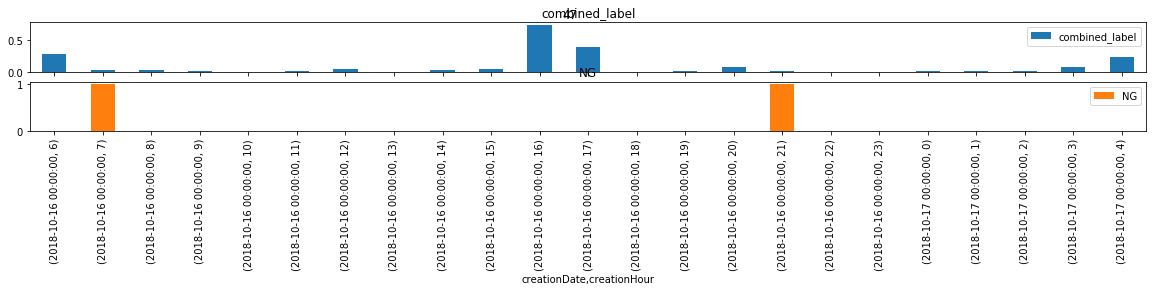

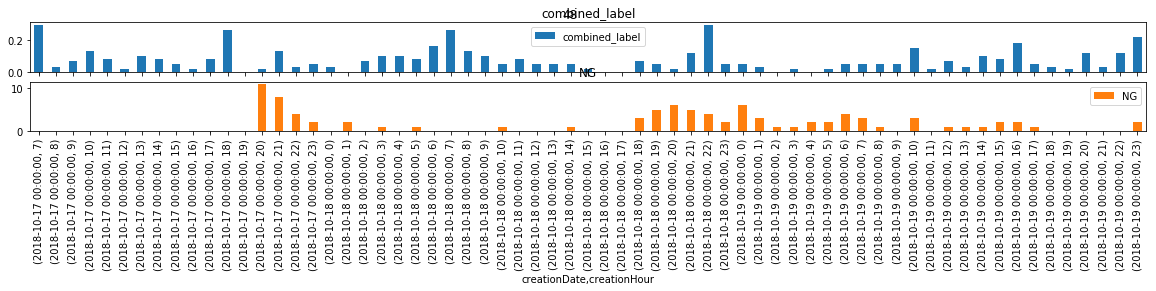

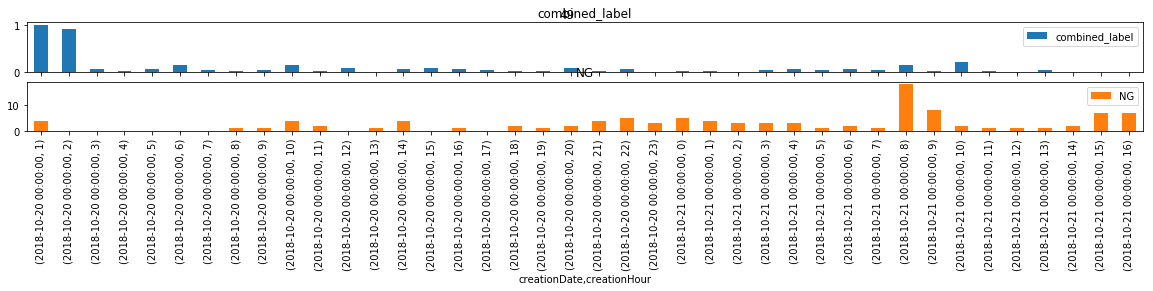

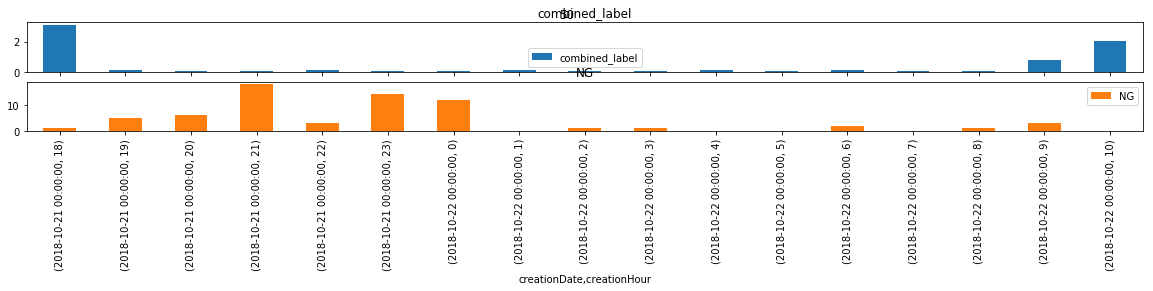

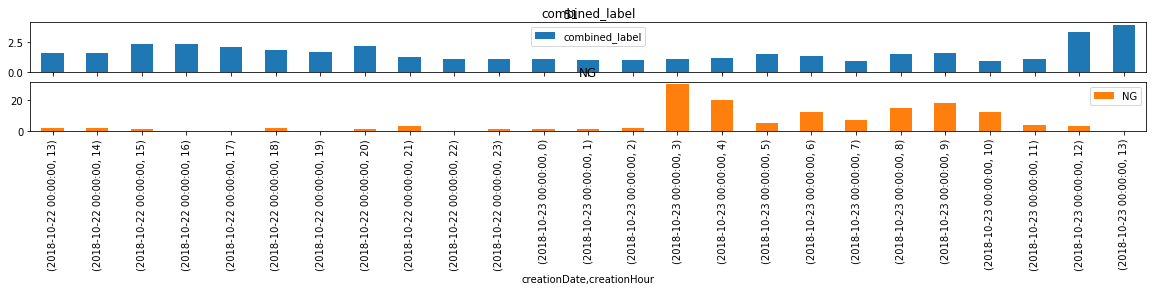

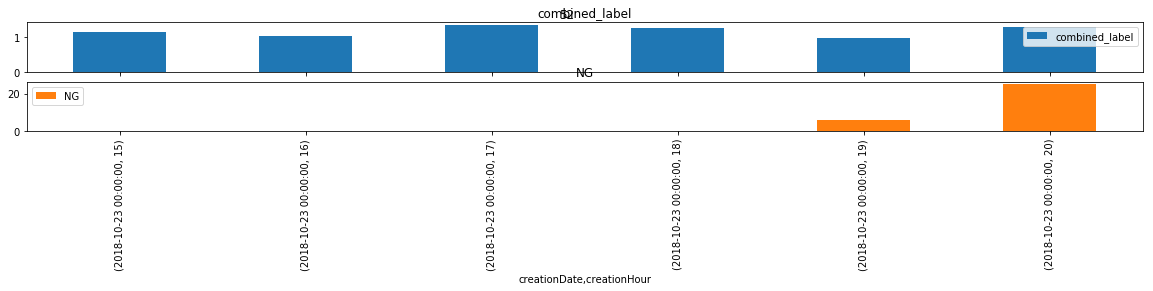

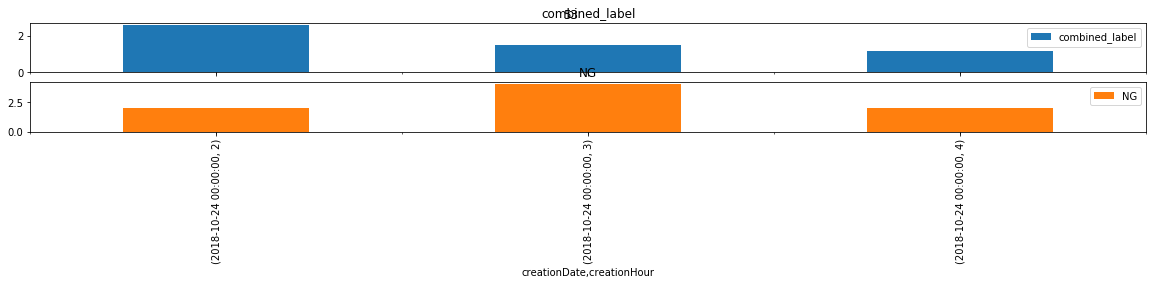

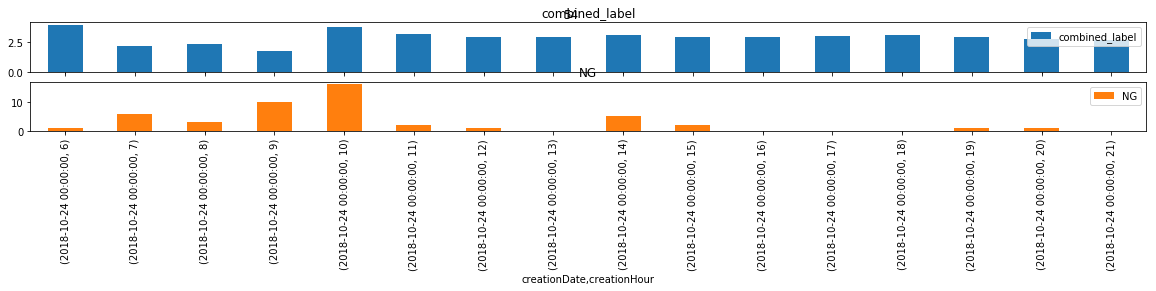

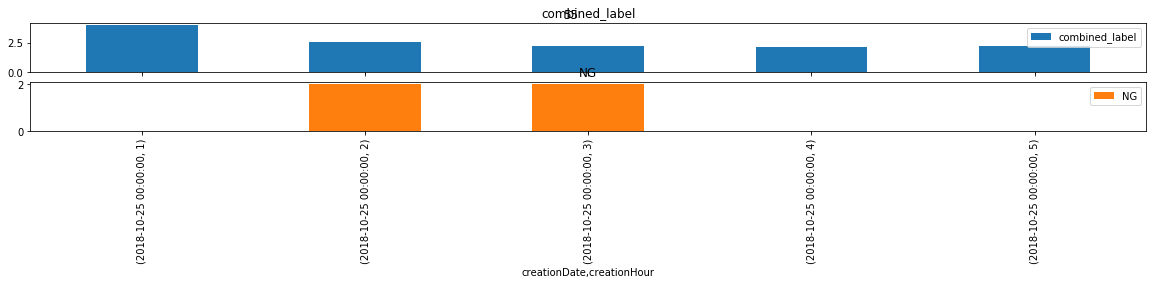

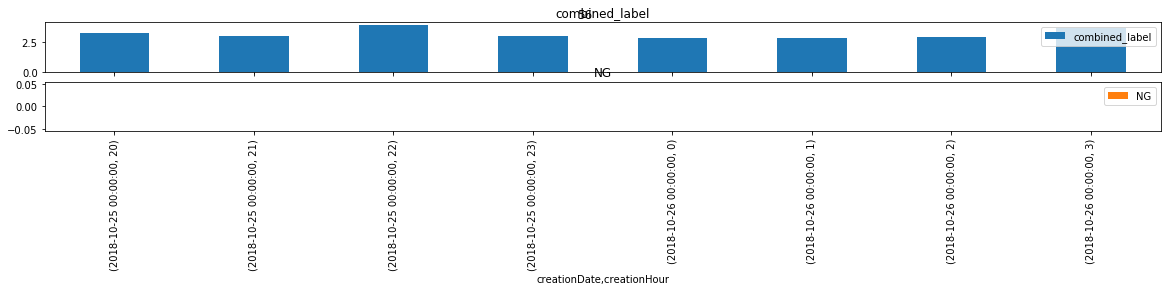

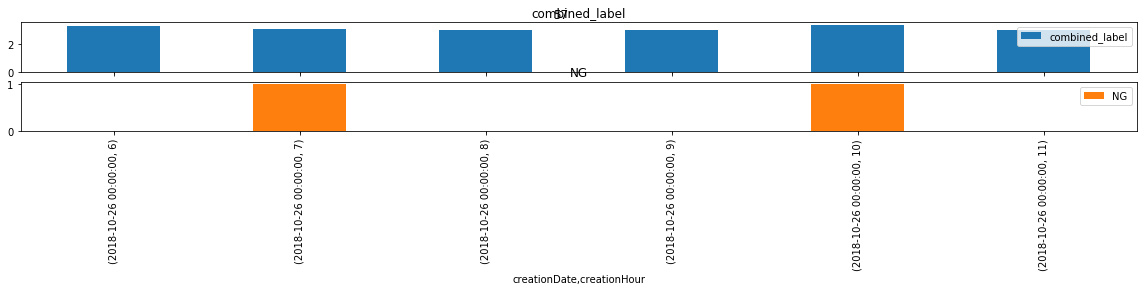

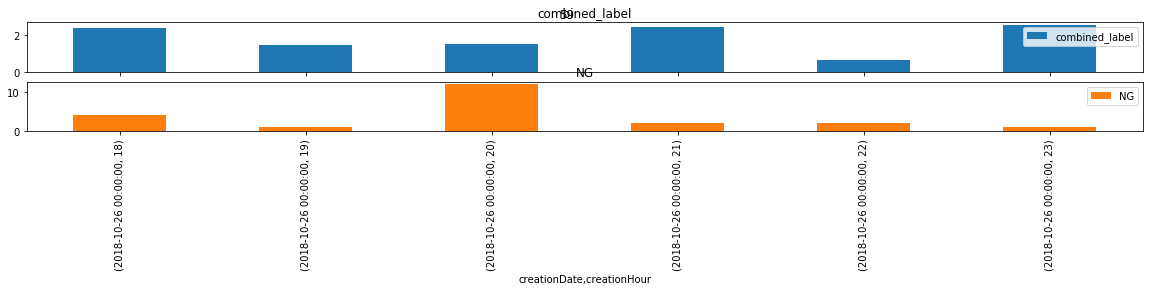

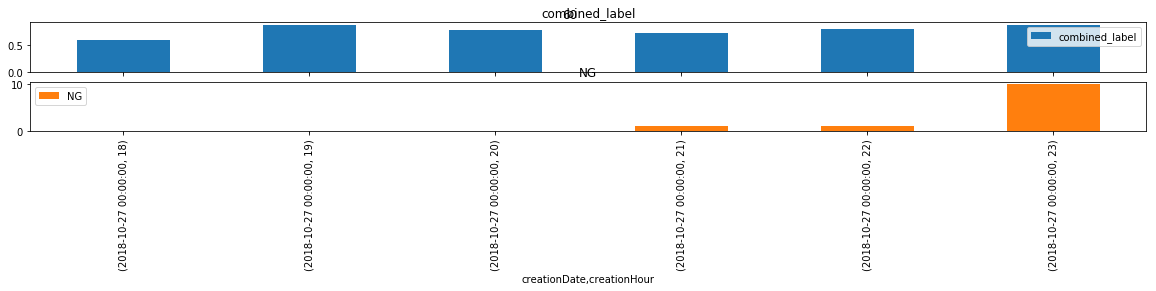

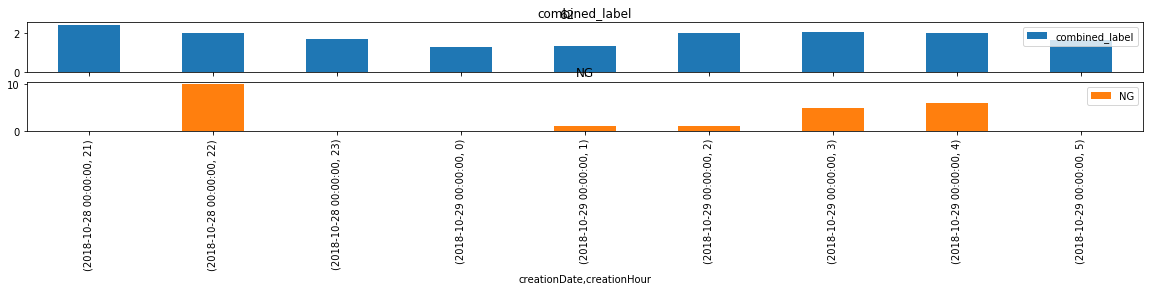

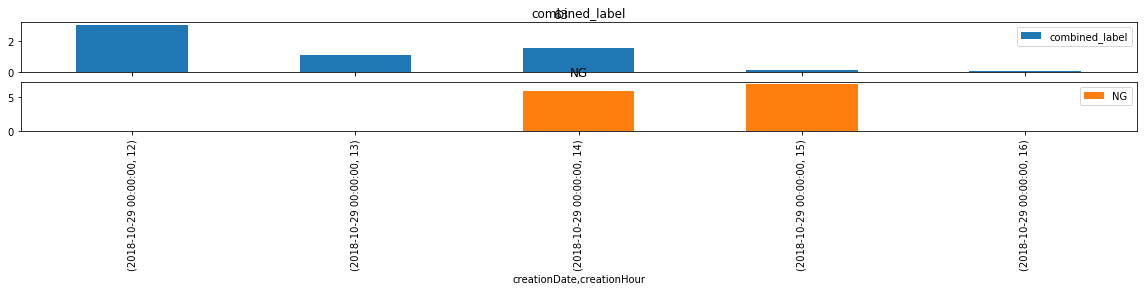

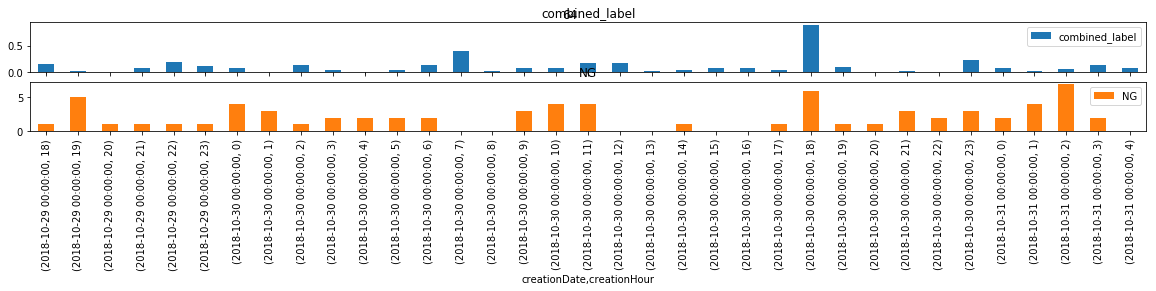

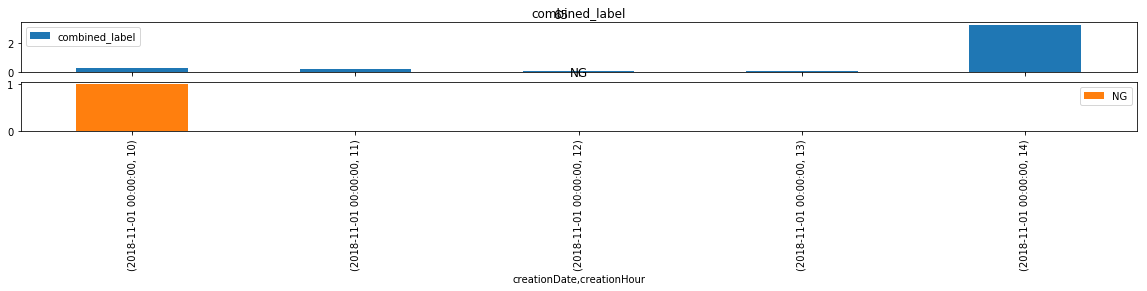

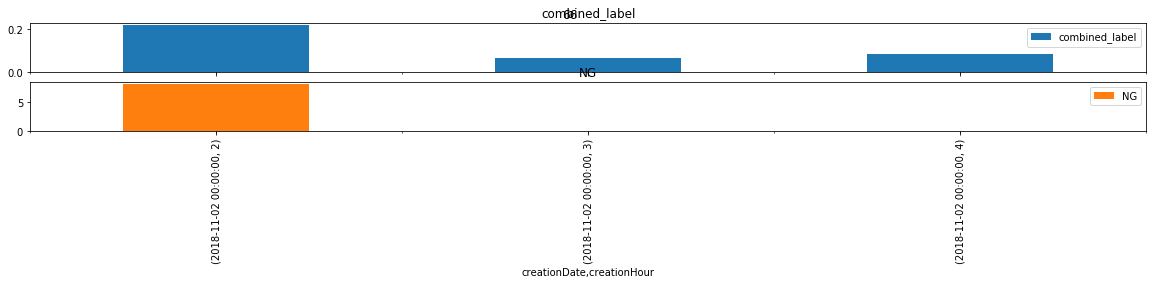

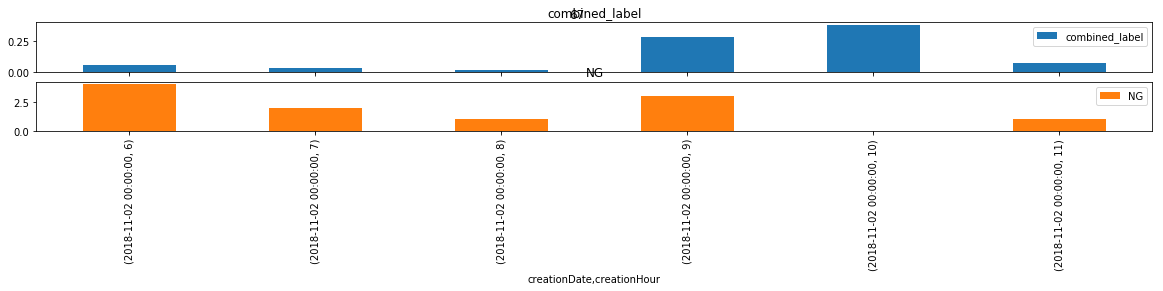

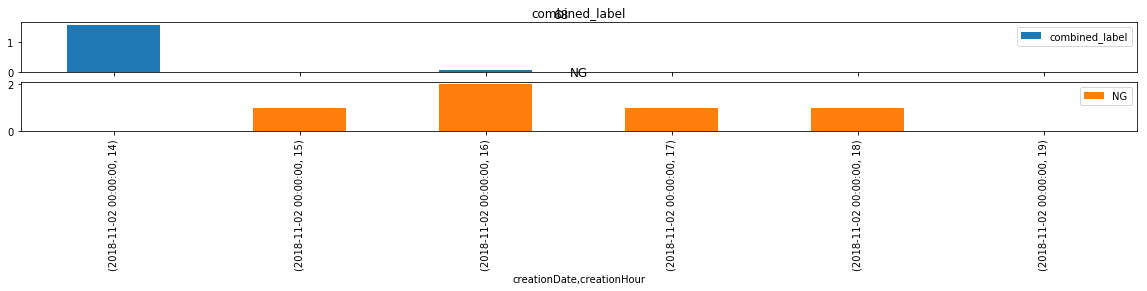

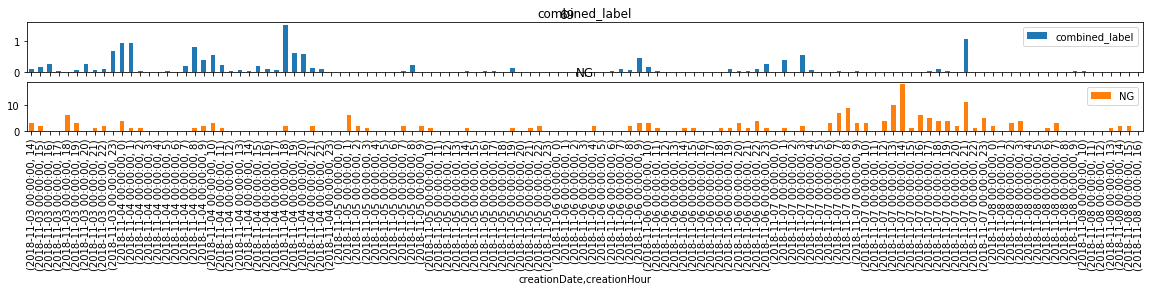

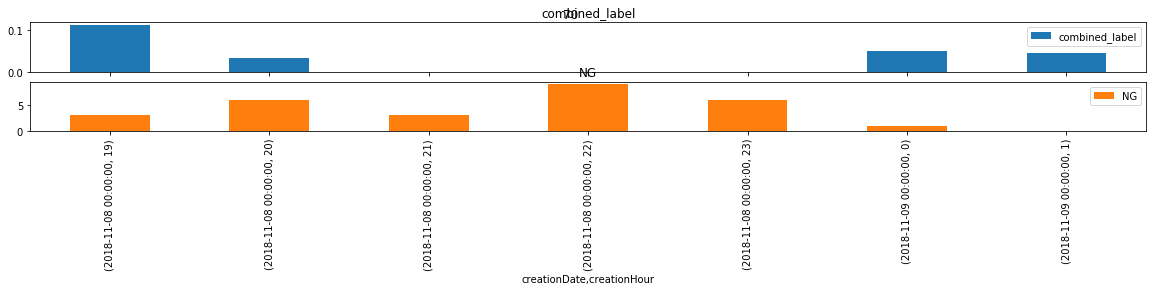

In [128]:
for cy in np.unique(isee_machine.CycleNum):
    temp = isee_machine[isee_machine.CycleNum==cy][['combined_label', 'NG','creationDate','creationHour']]
    temp = temp.set_index(isee_machine[isee_machine.CycleNum==cy].creationTime)
    gr_df = temp.groupby(['creationDate','creationHour'])
    temp = pd.concat([gr_df['combined_label'].mean(), gr_df[['NG']].sum()], axis=1)
    temp.plot(kind='bar', figsize=(20,2), title=cy, subplots=True)   

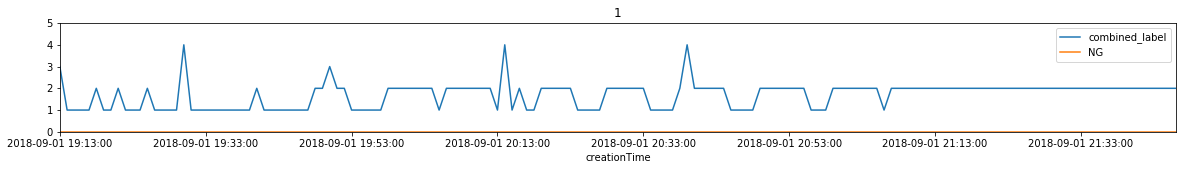

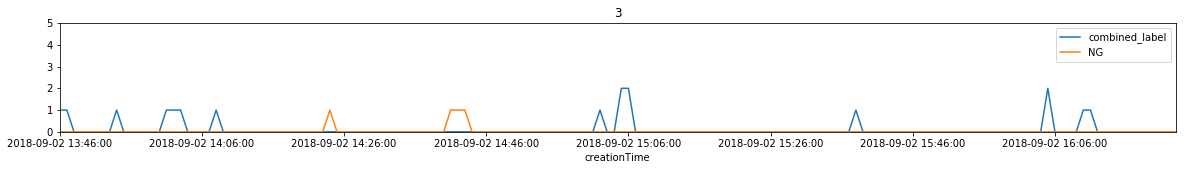

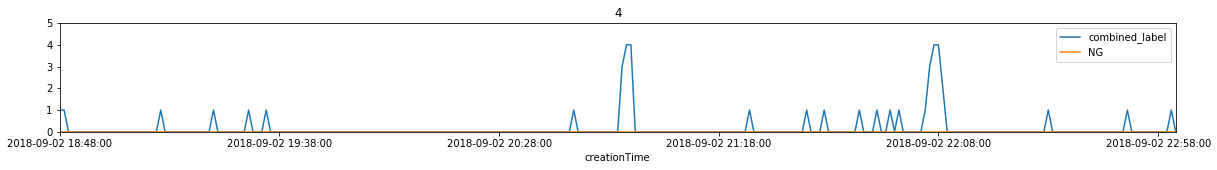

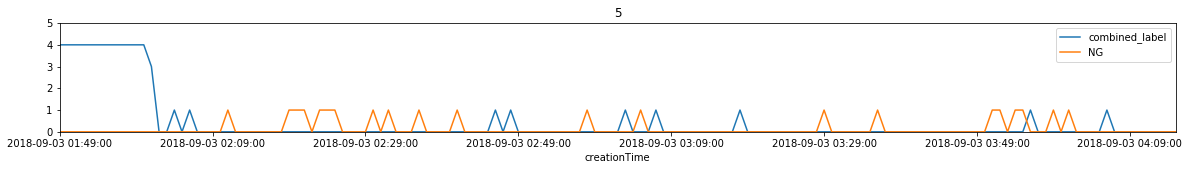

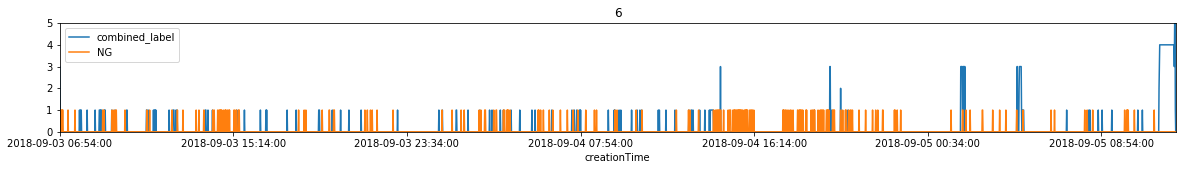

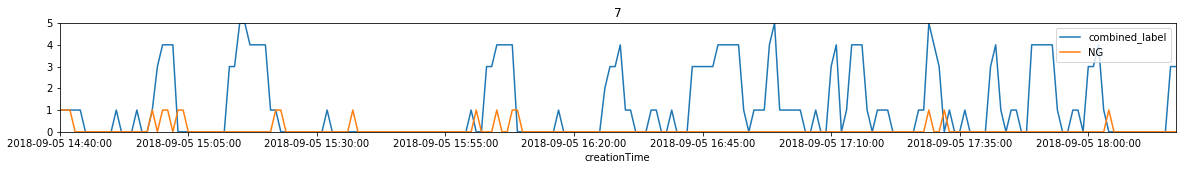

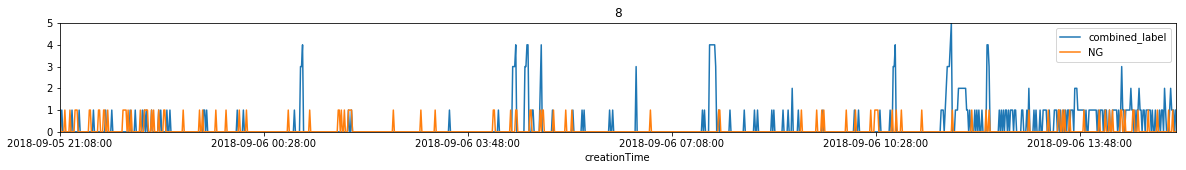

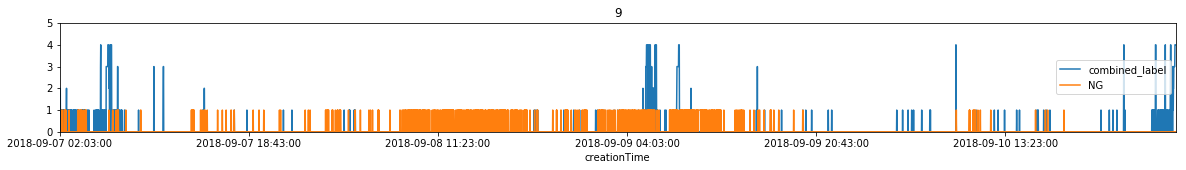

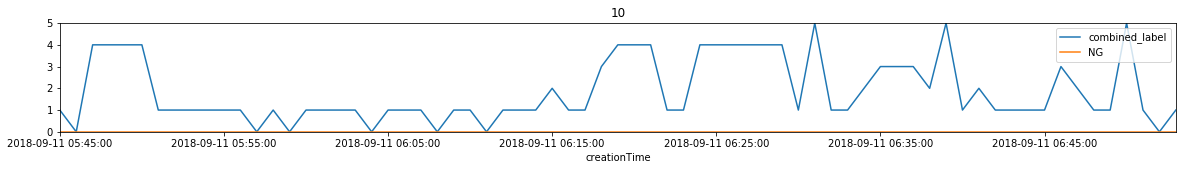

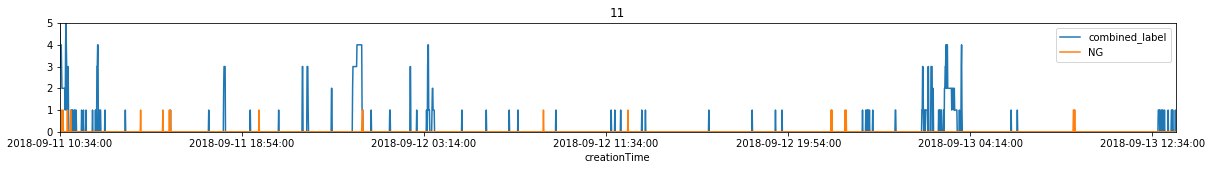

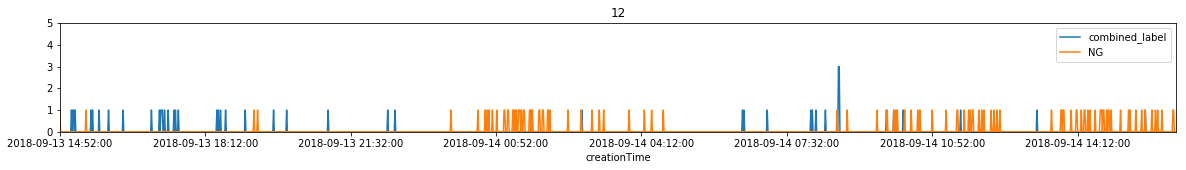

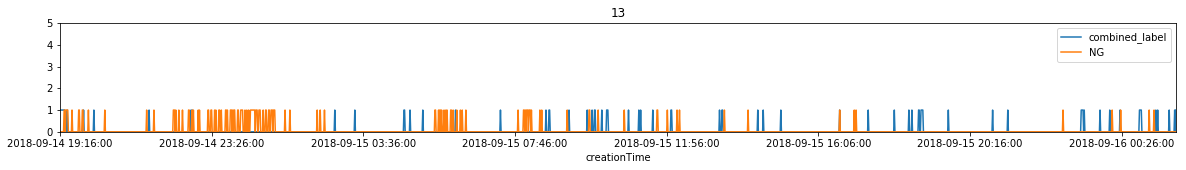

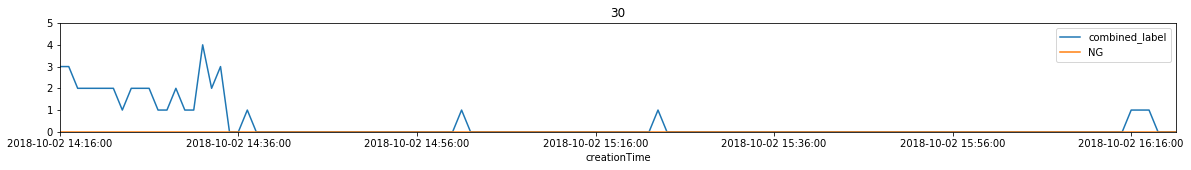

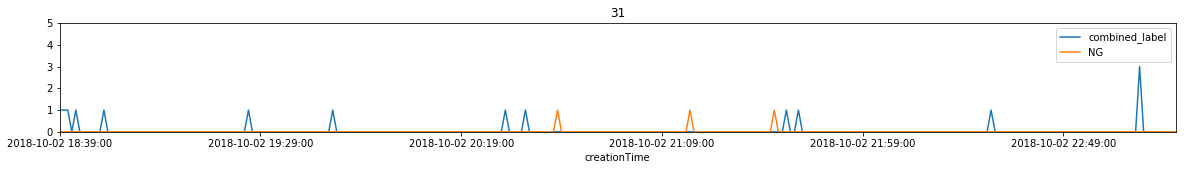

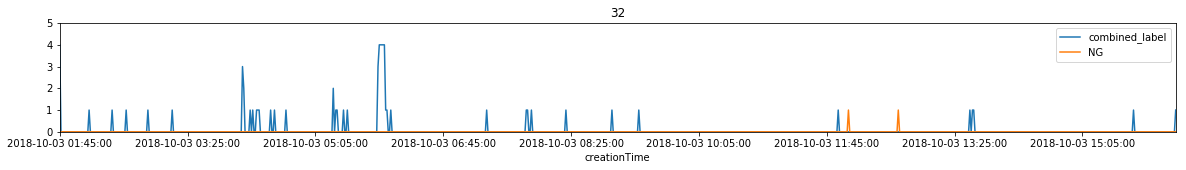

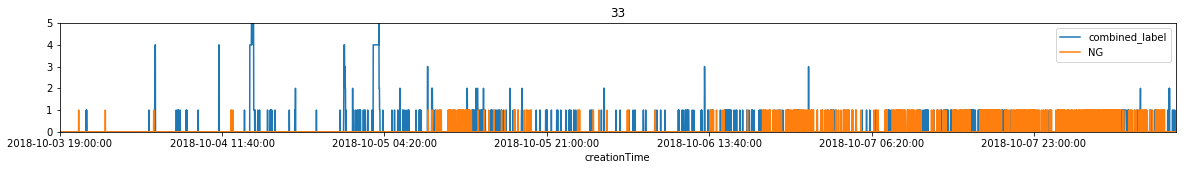

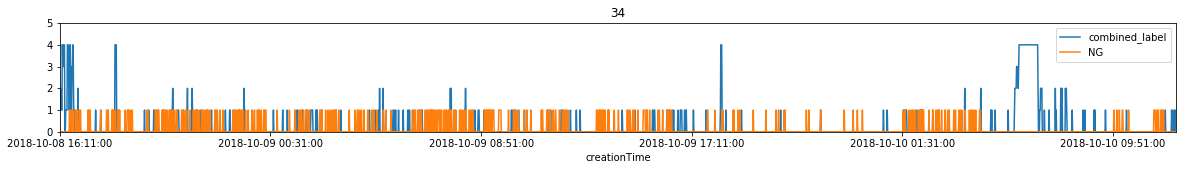

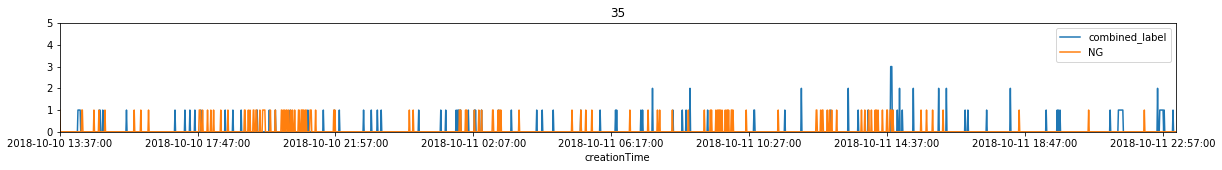

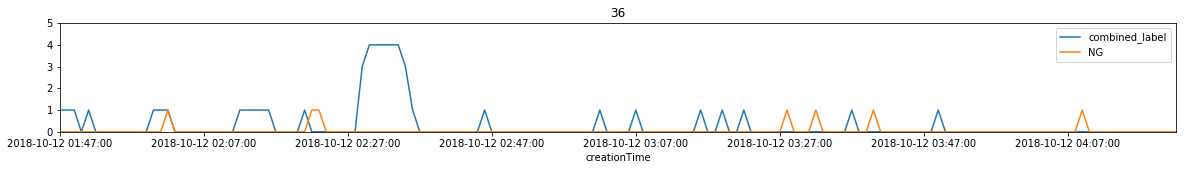

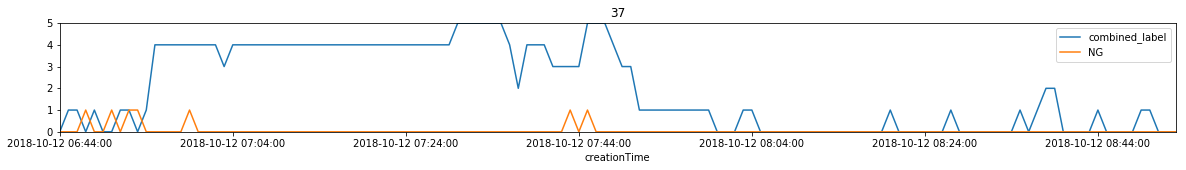

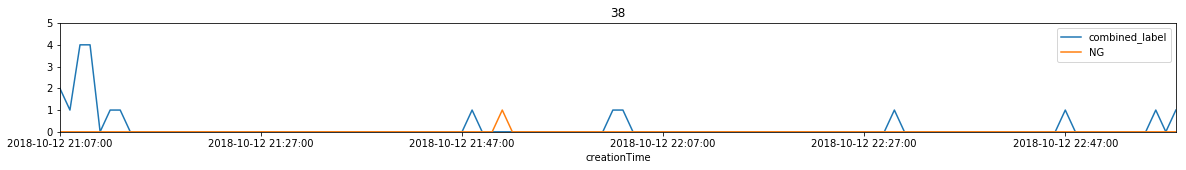

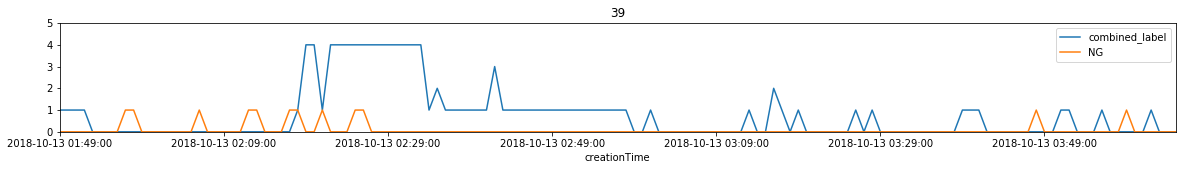

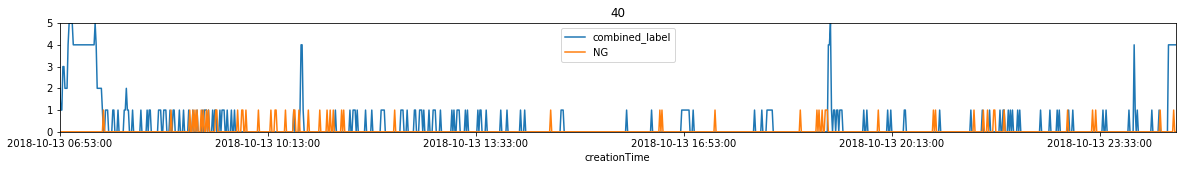

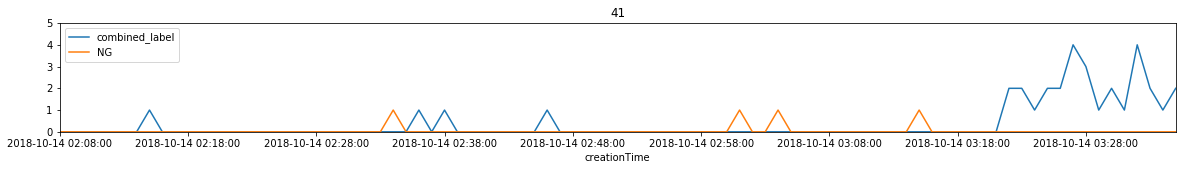

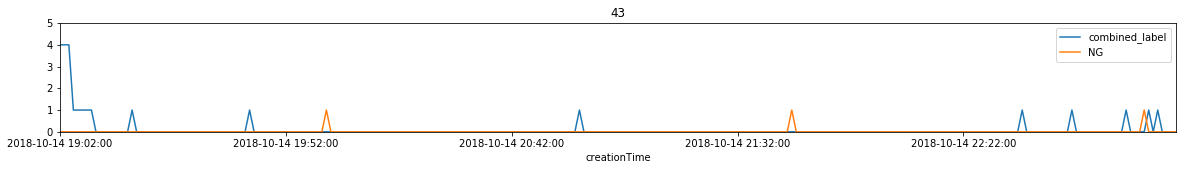

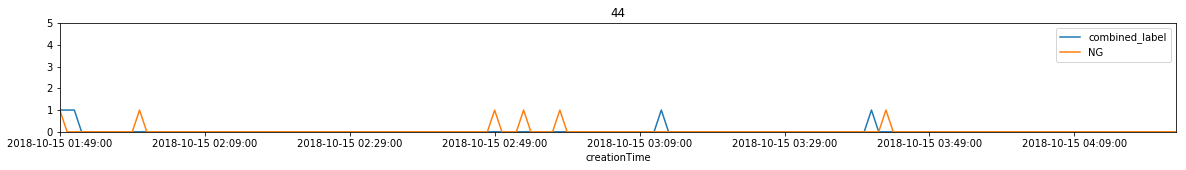

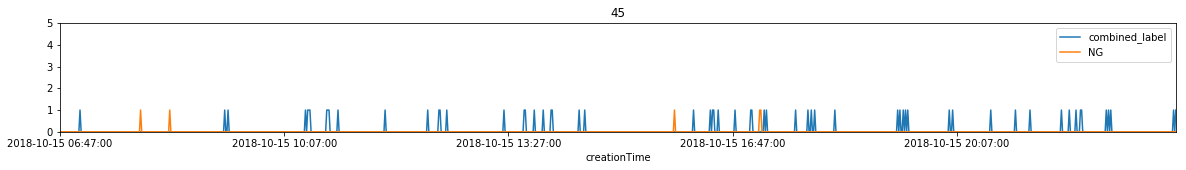

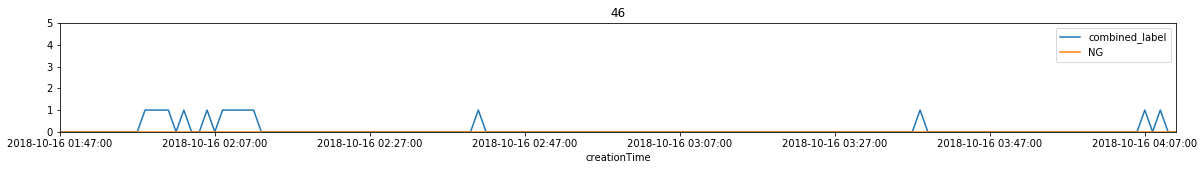

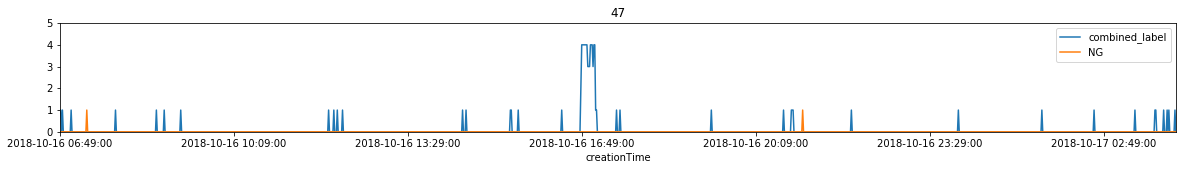

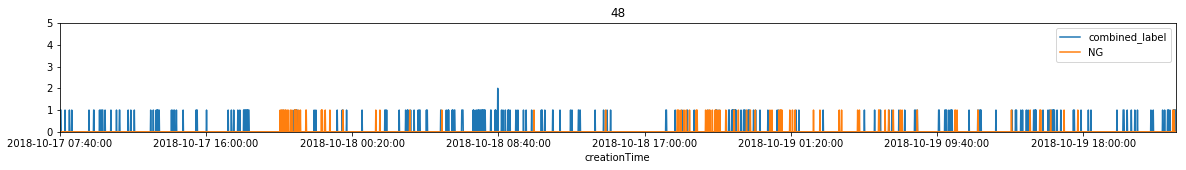

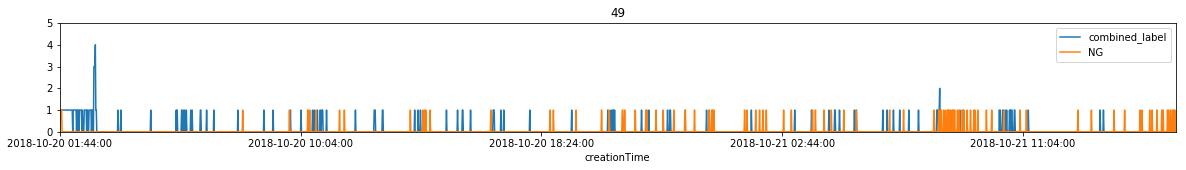

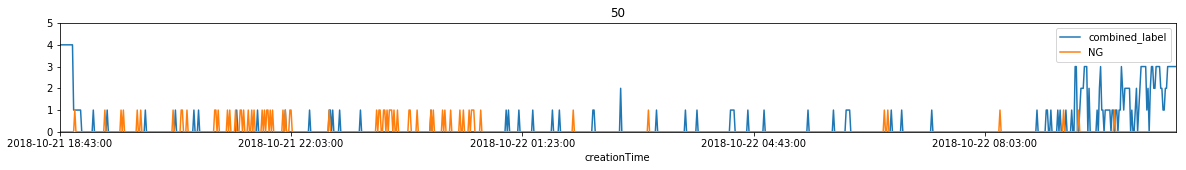

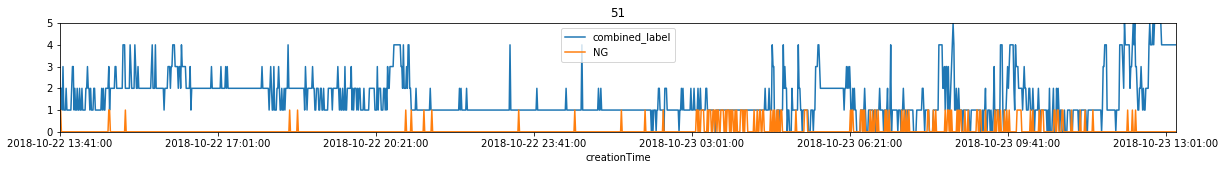

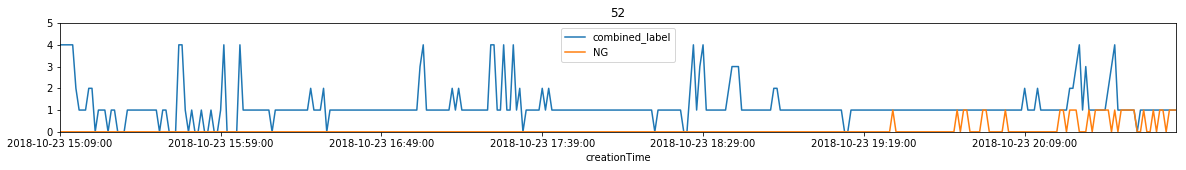

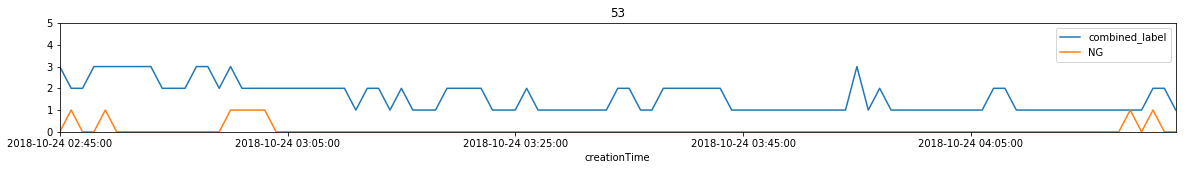

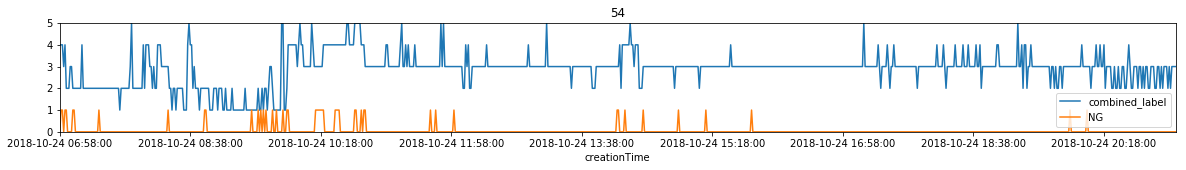

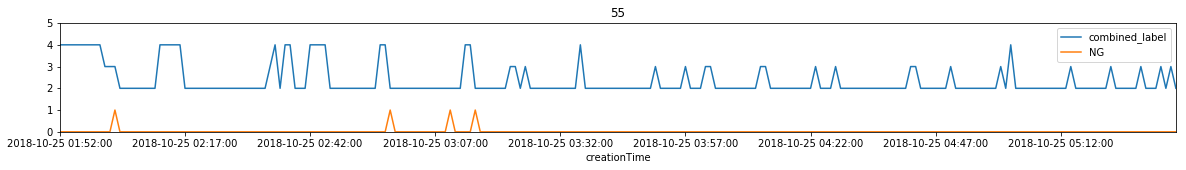

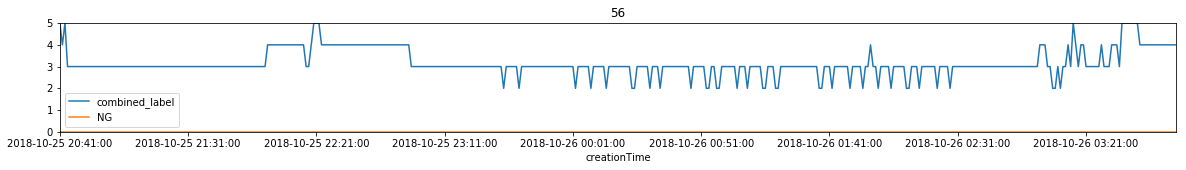

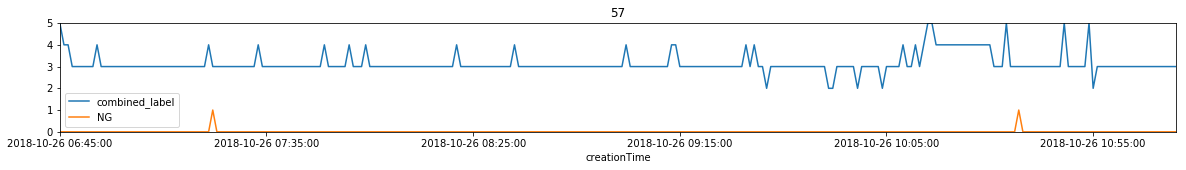

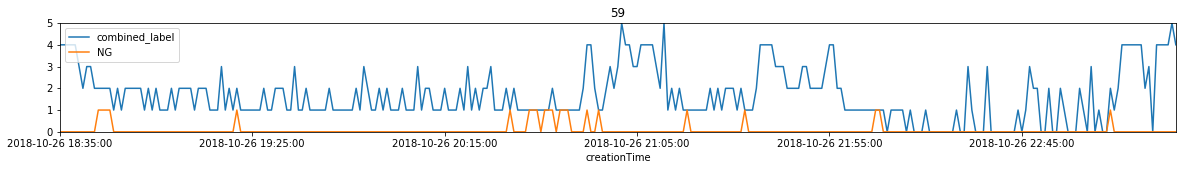

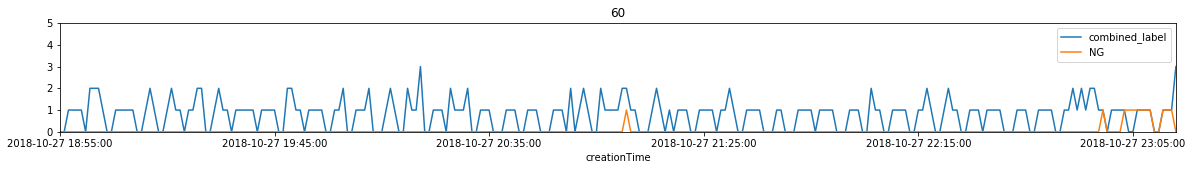

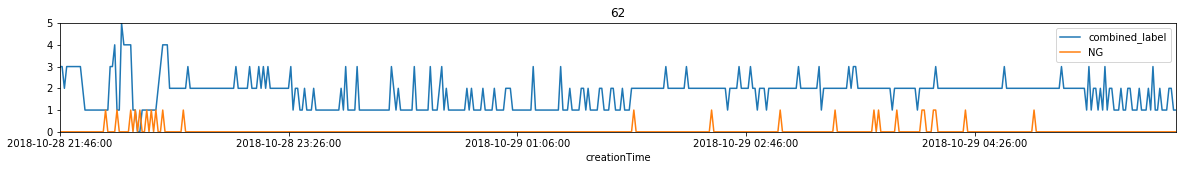

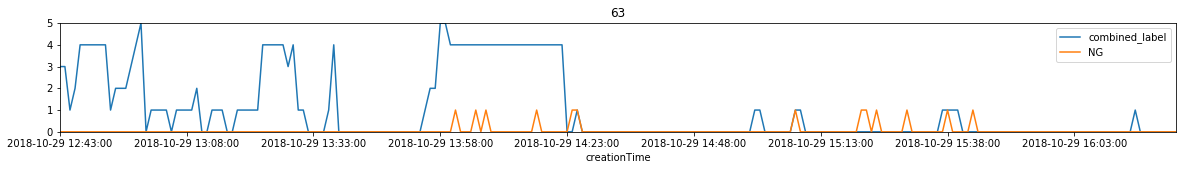

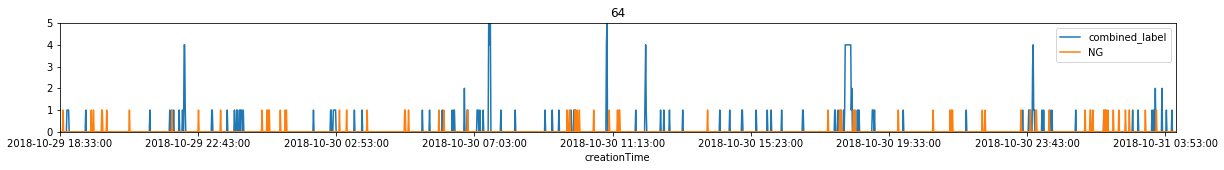

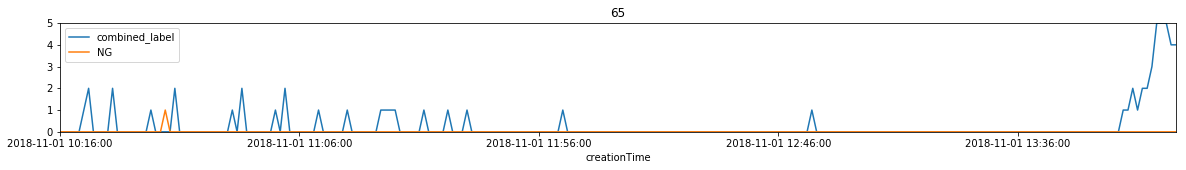

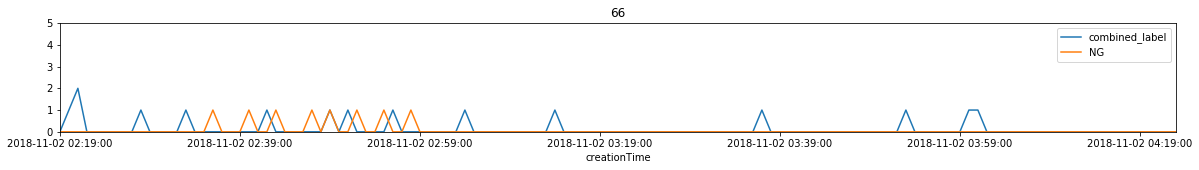

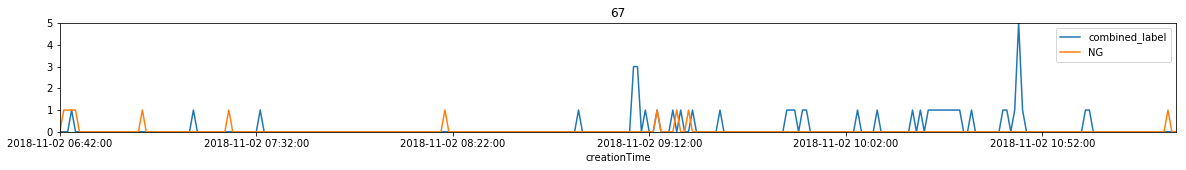

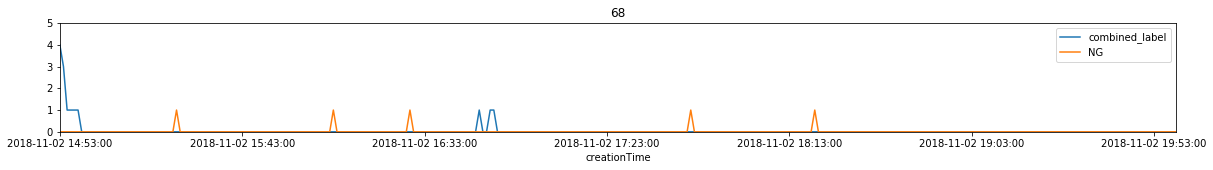

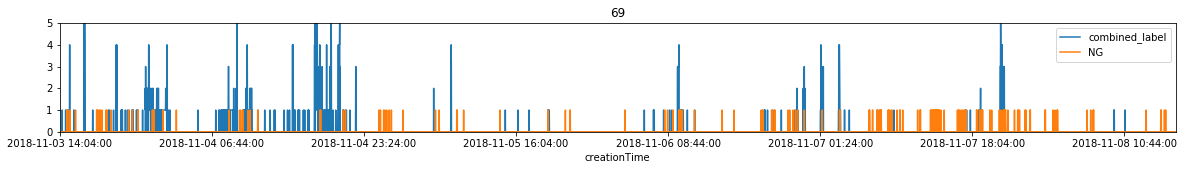

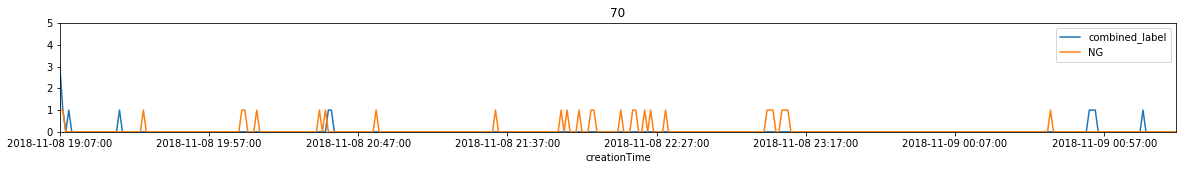

In [105]:
for cy in np.unique(isee_machine.CycleNum):
    temp = isee_machine[isee_machine.CycleNum==cy][['combined_label', 'NG']]
    temp = temp.set_index(isee_machine[isee_machine.CycleNum==cy].creationTime)
    temp.plot(figsize=(20,2), ylim=(0,5), title=cy)    

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


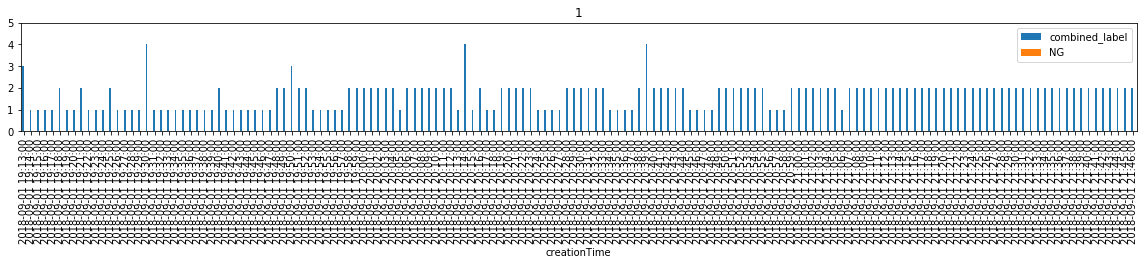

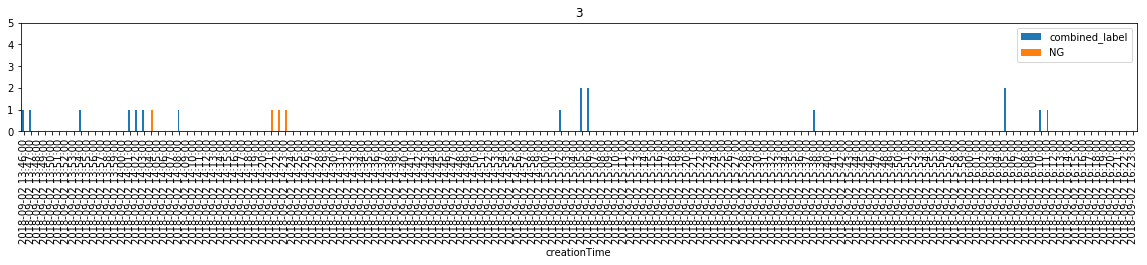

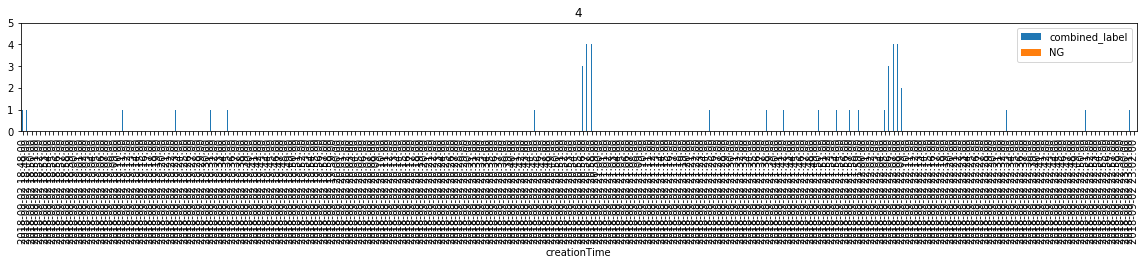

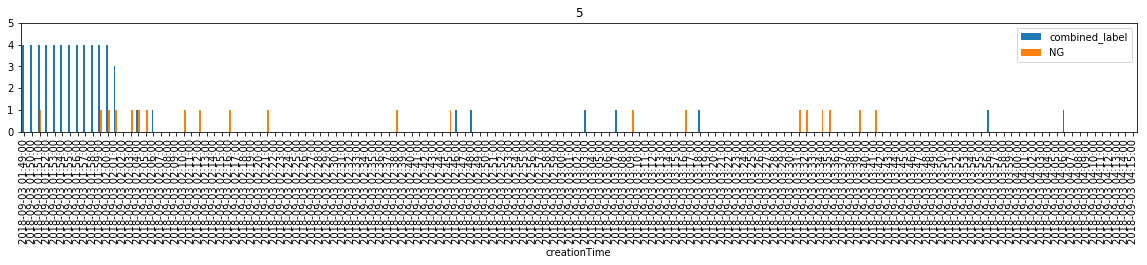

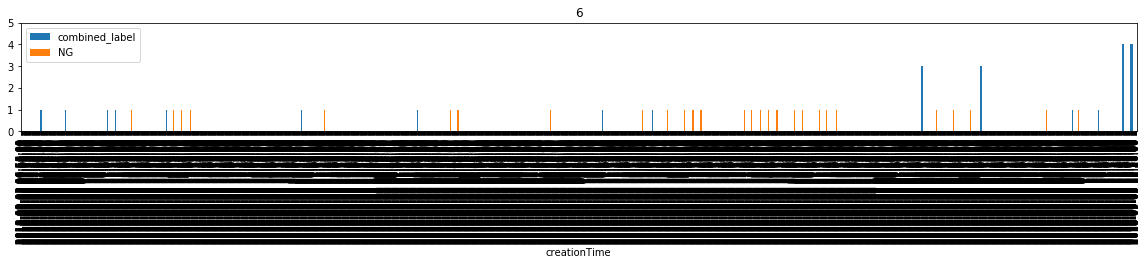

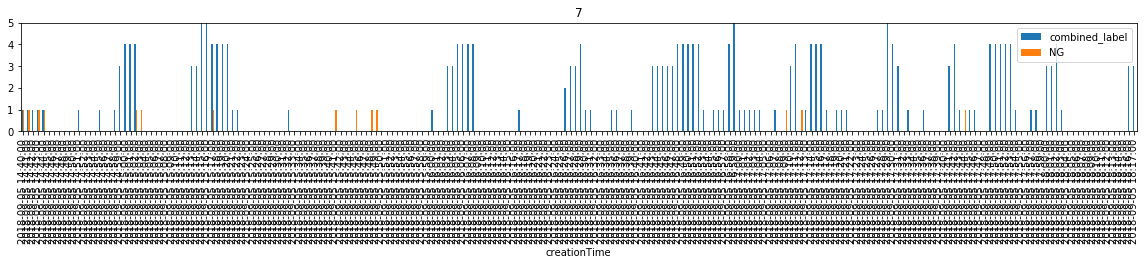

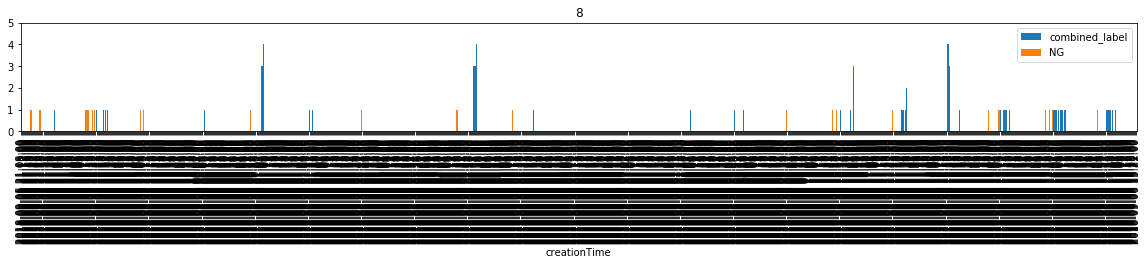

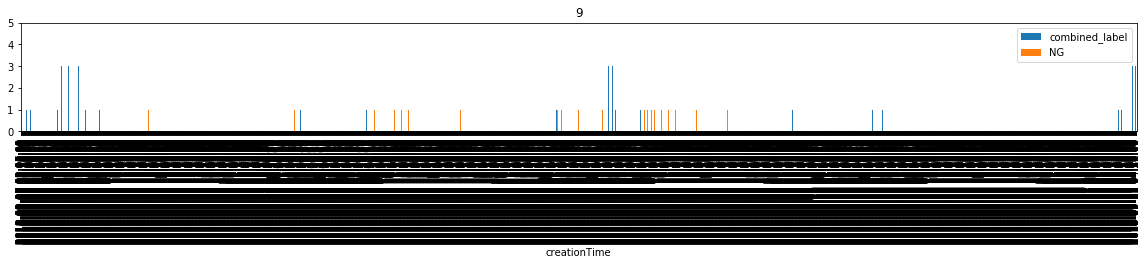

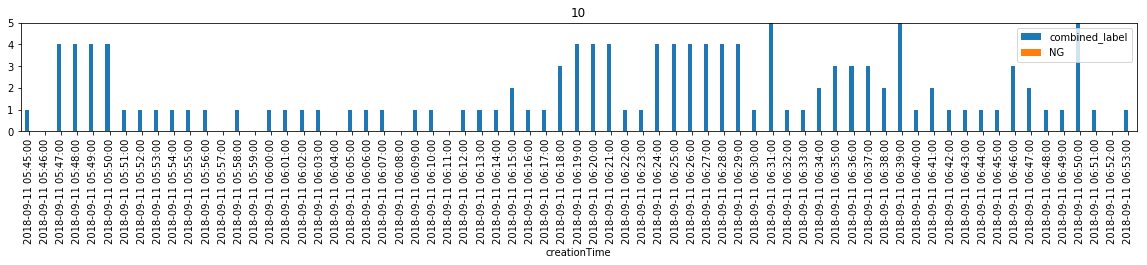

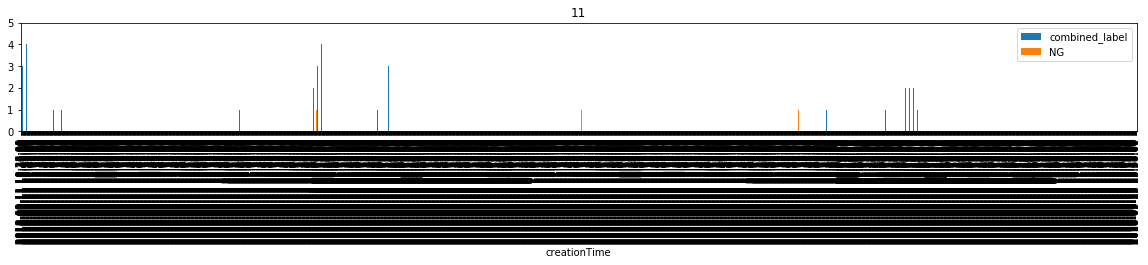

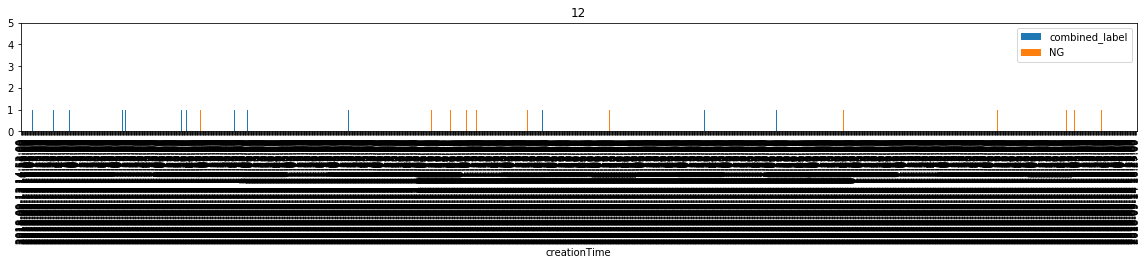

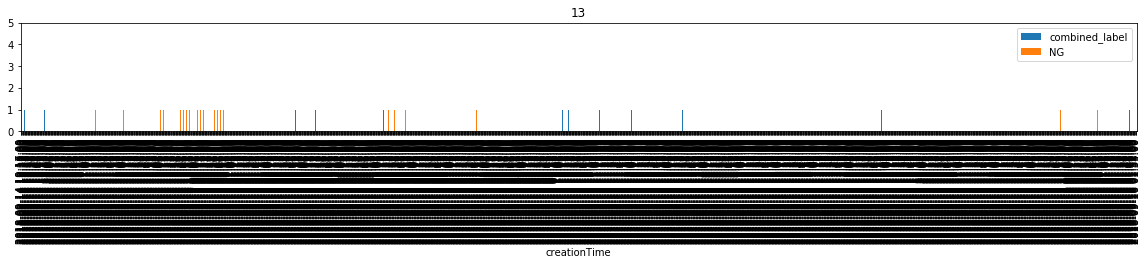

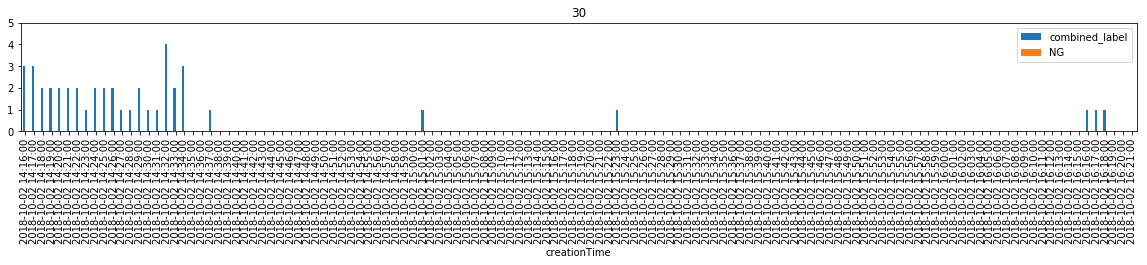

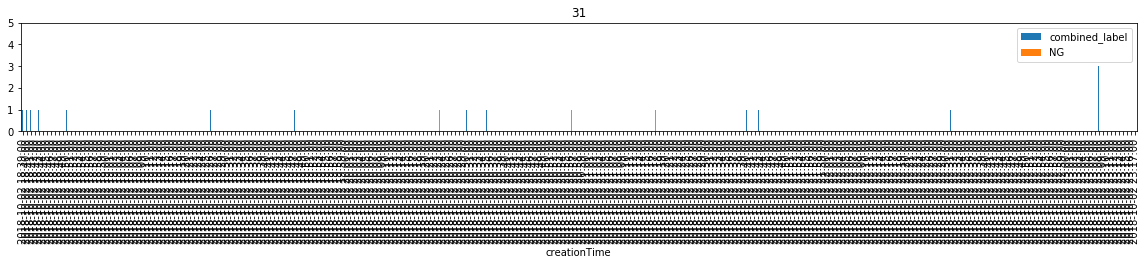

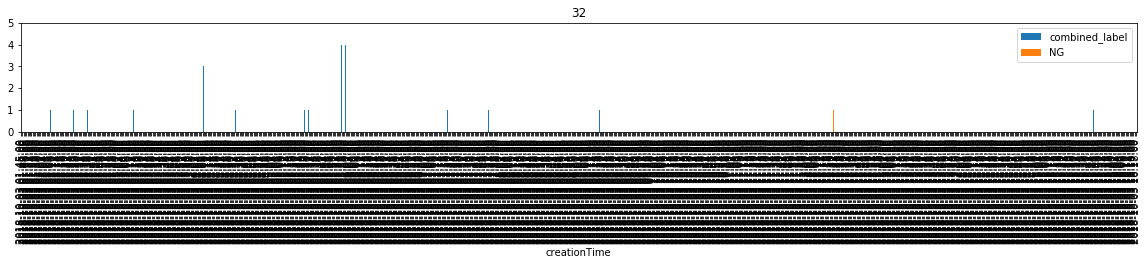

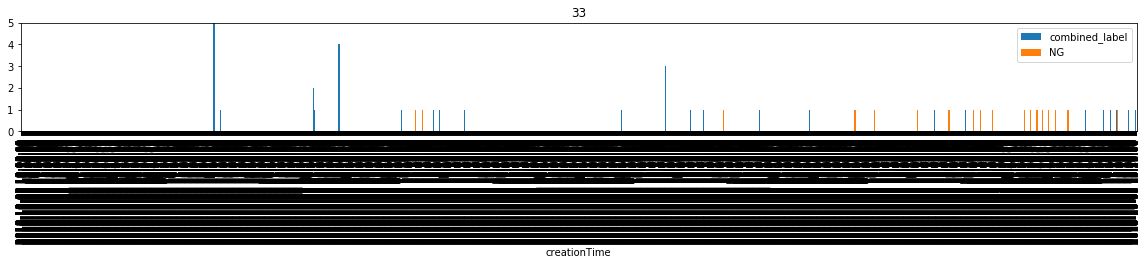

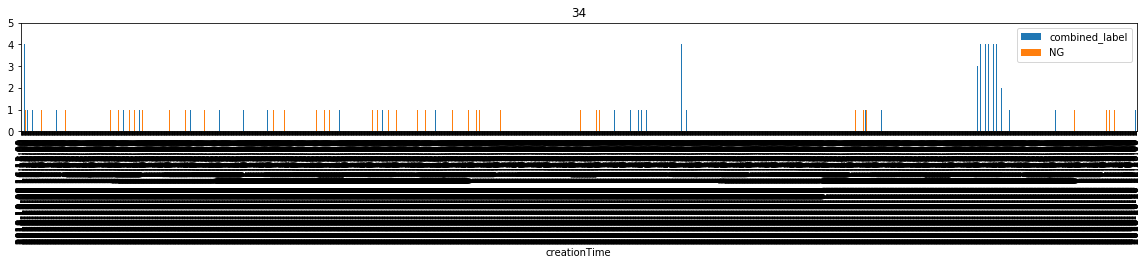

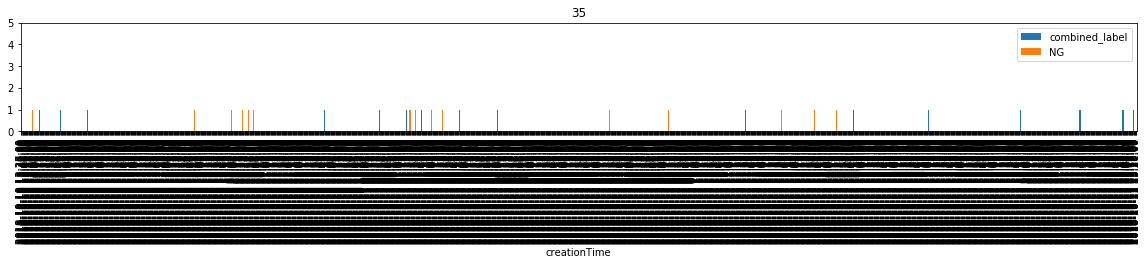

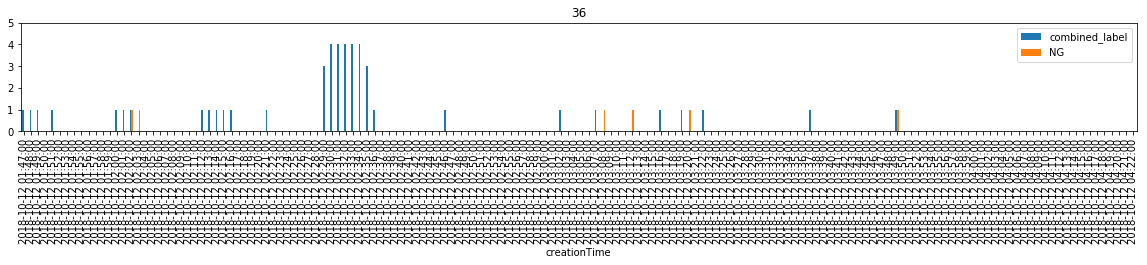

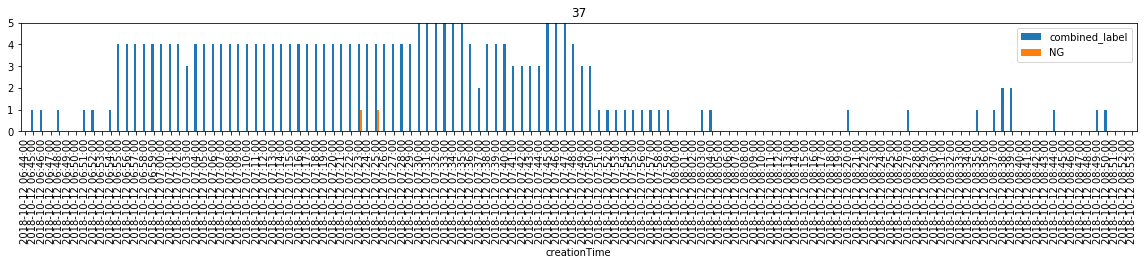

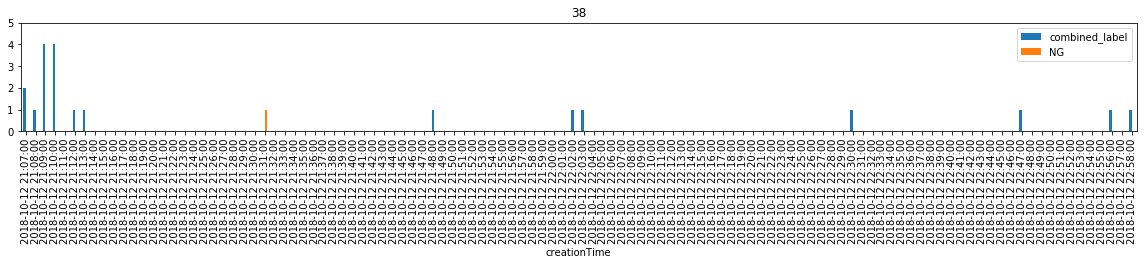

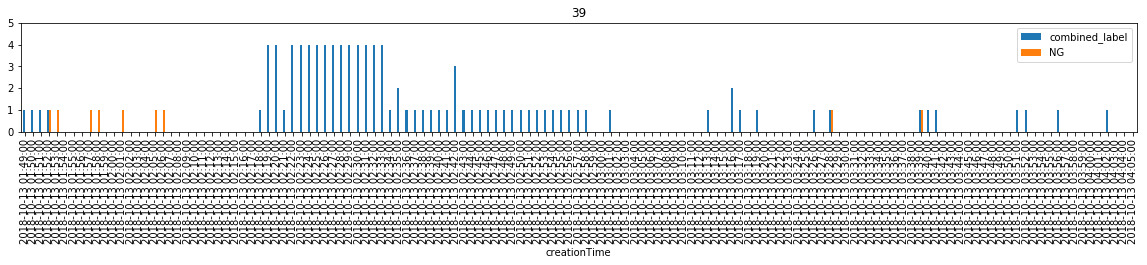

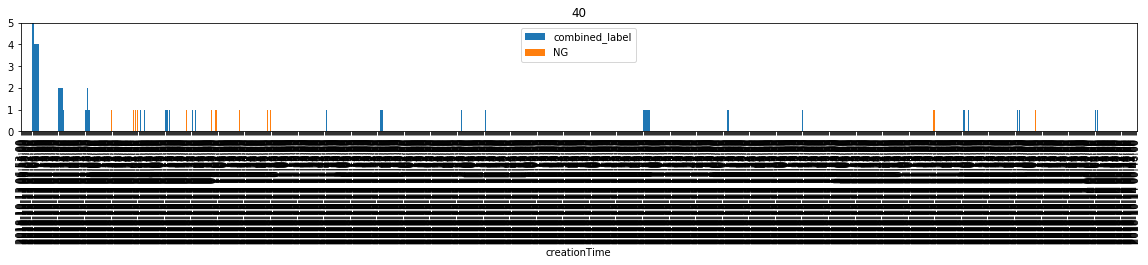

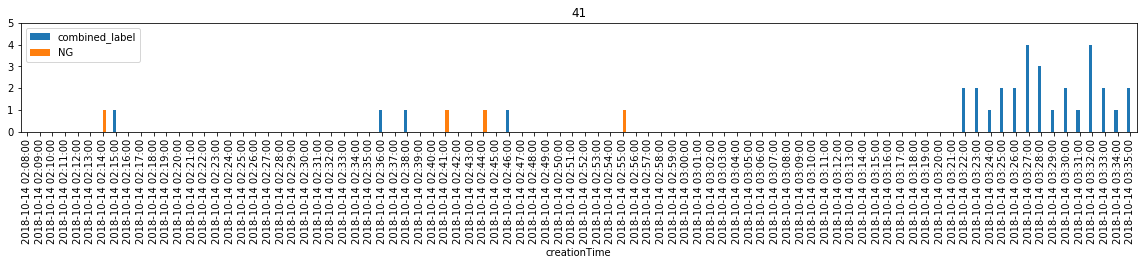

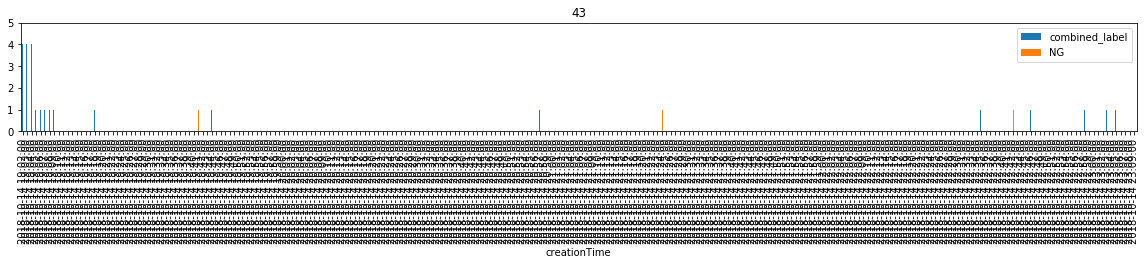

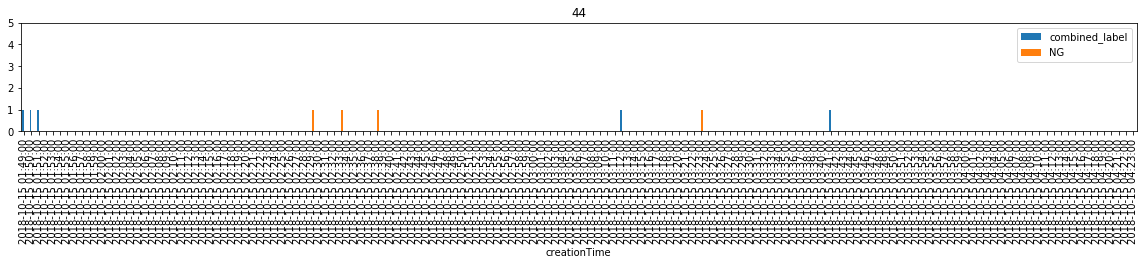

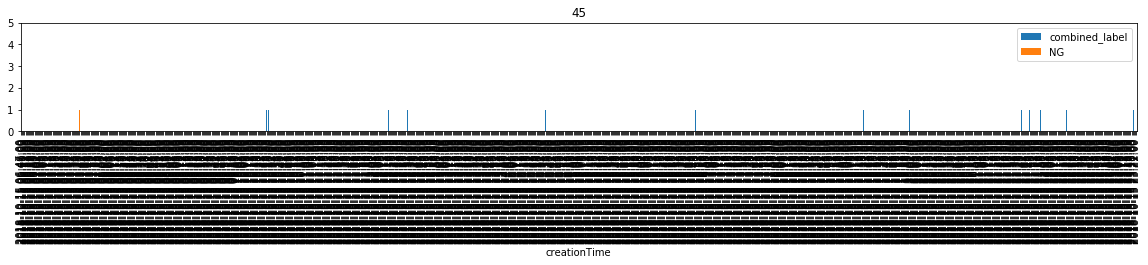

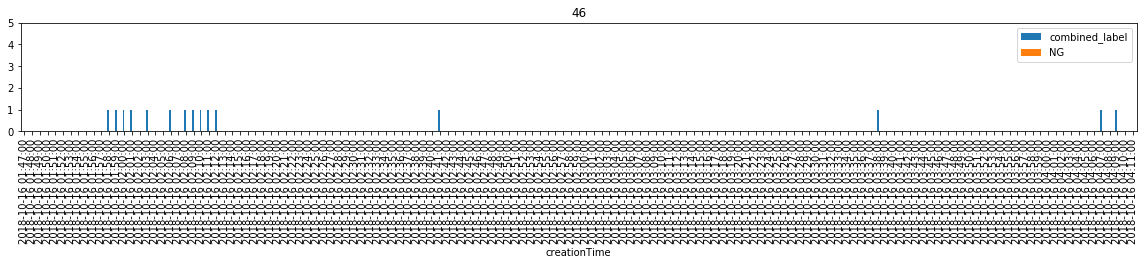

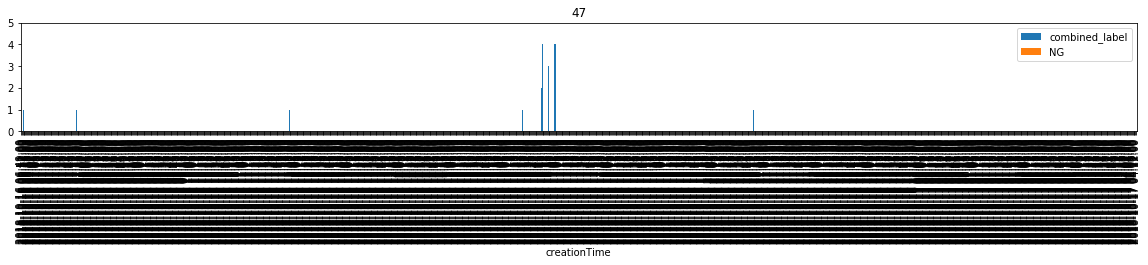

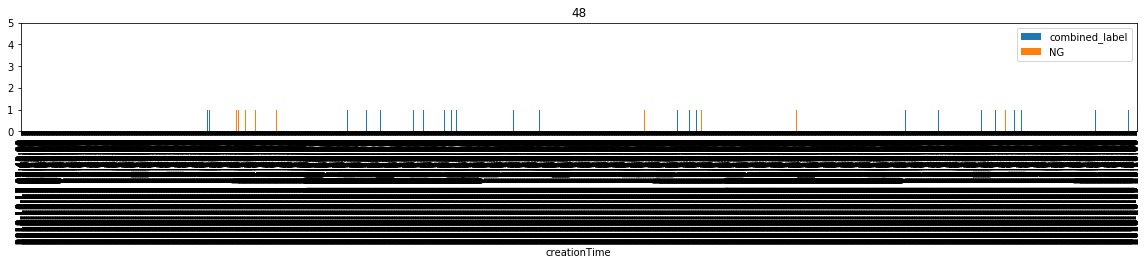

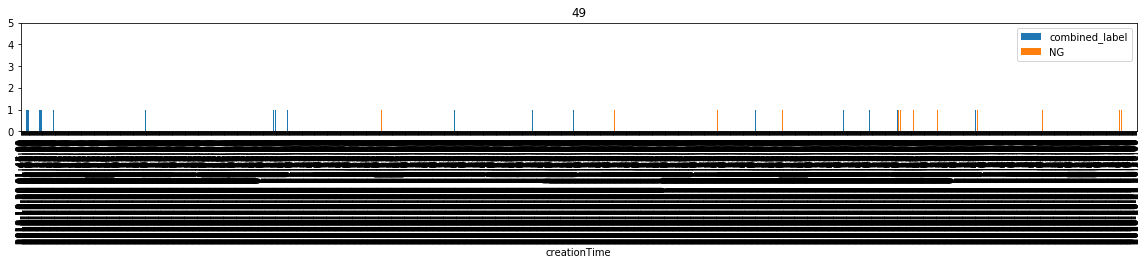

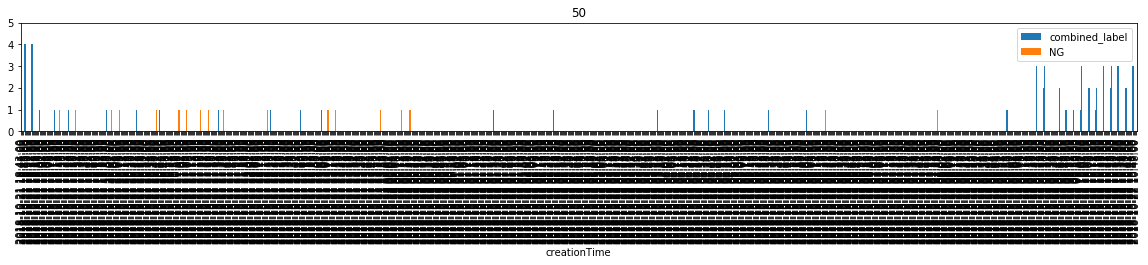

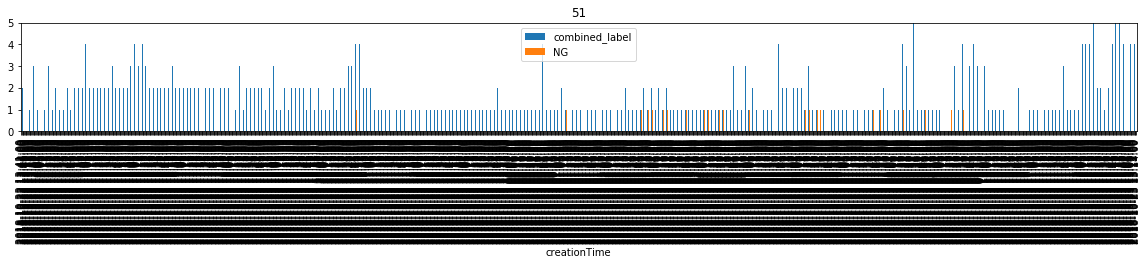

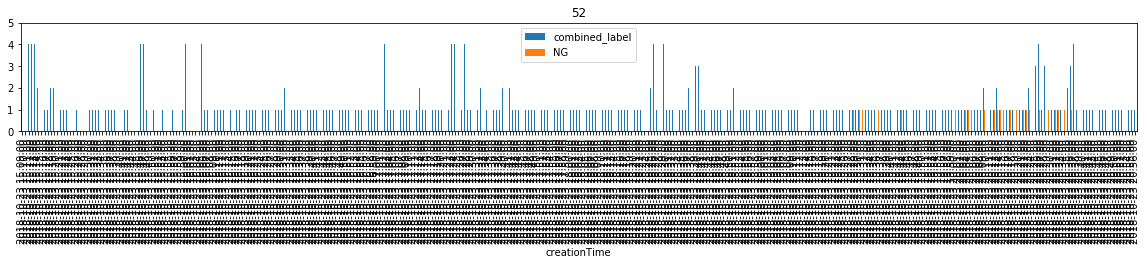

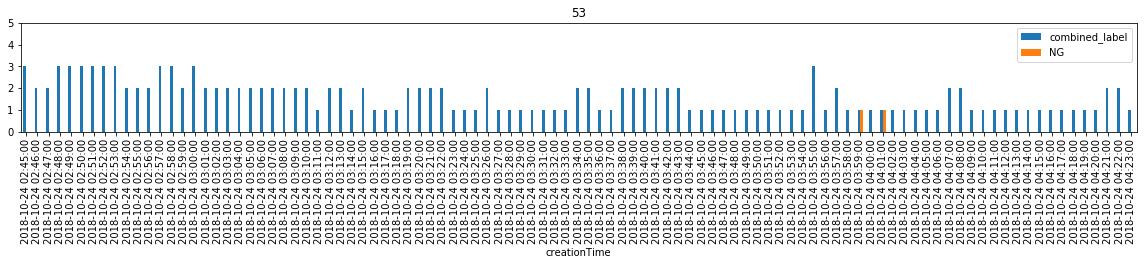

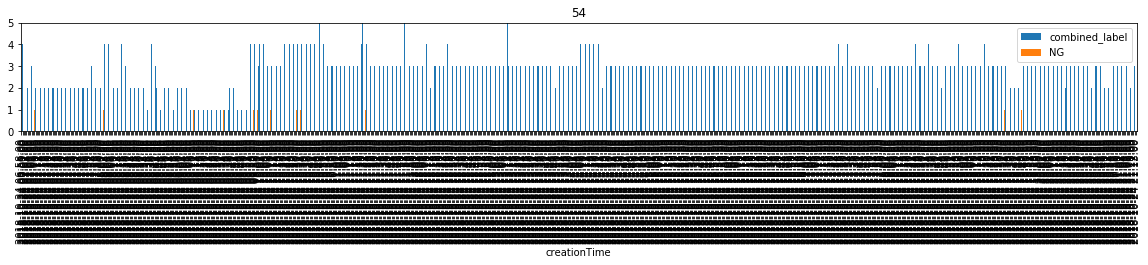

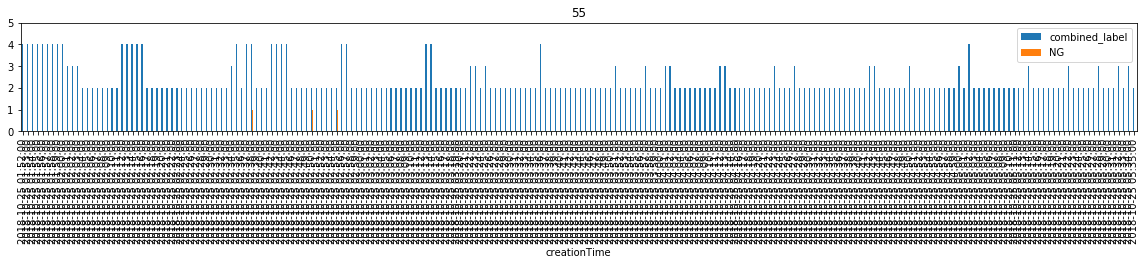

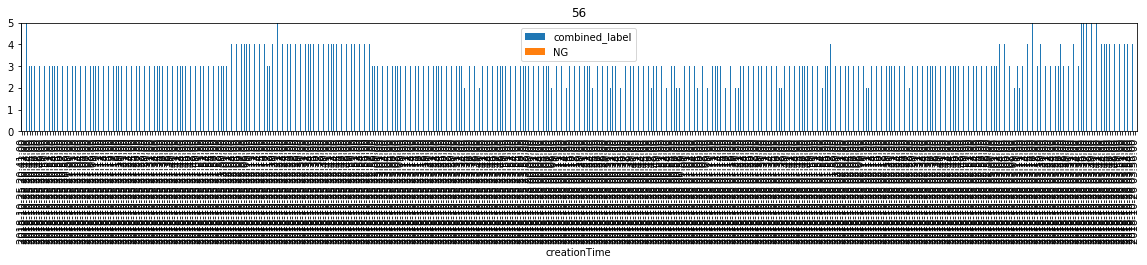

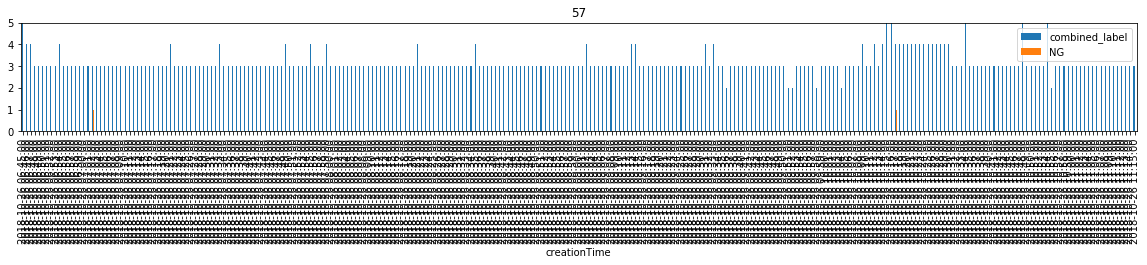

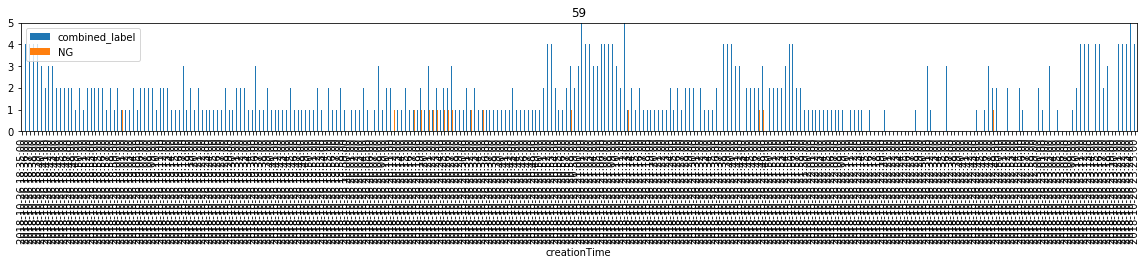

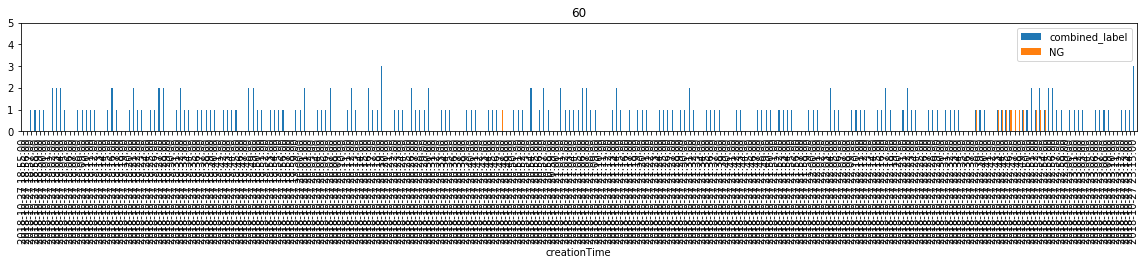

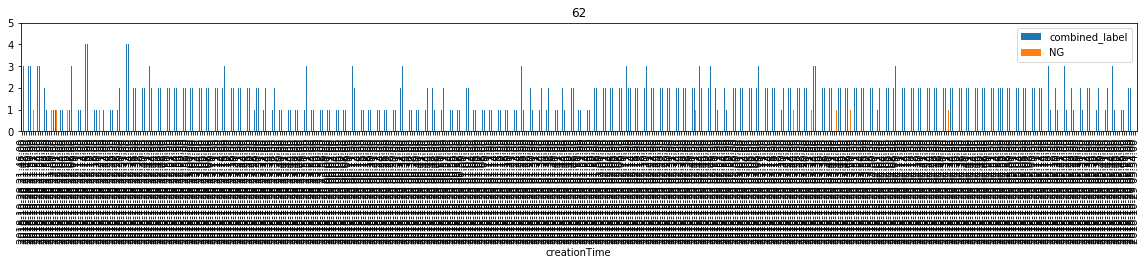

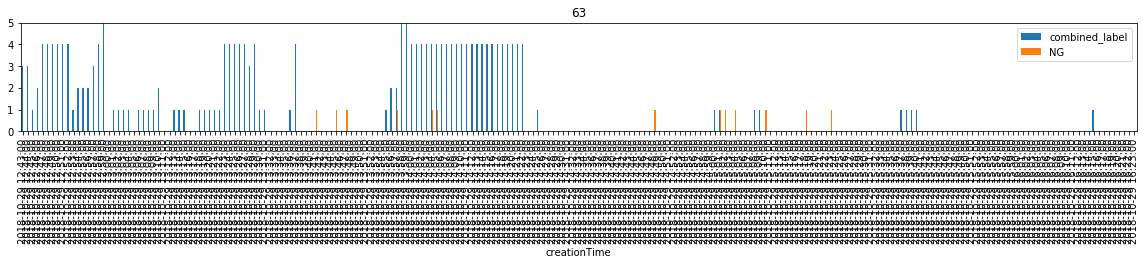

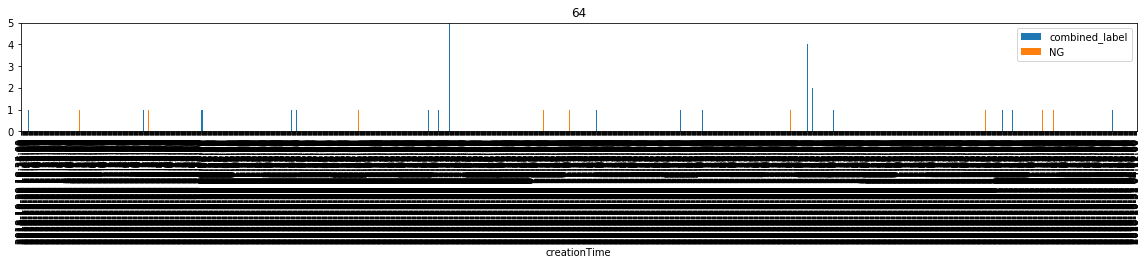

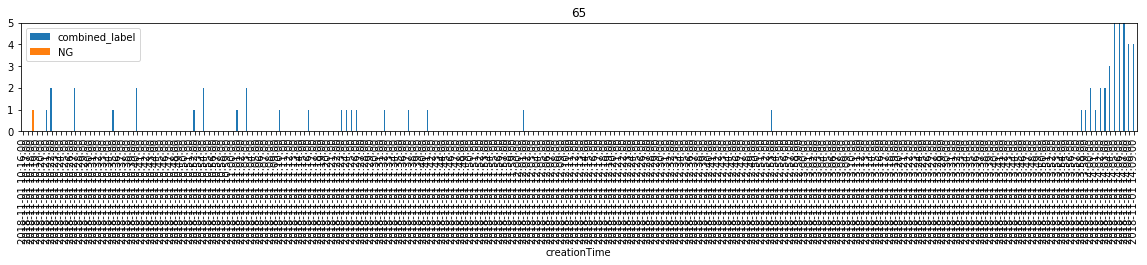

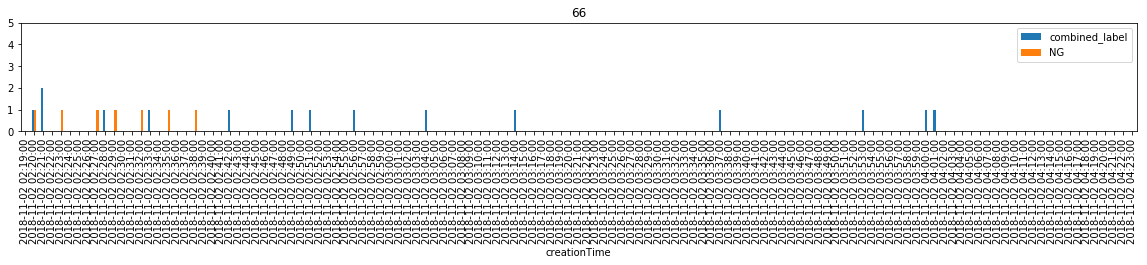

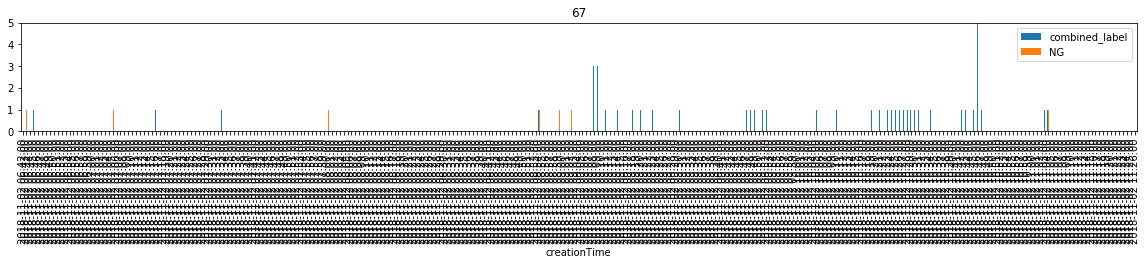

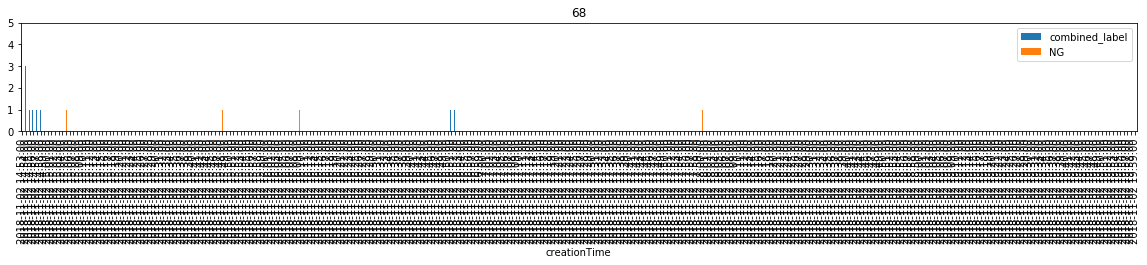

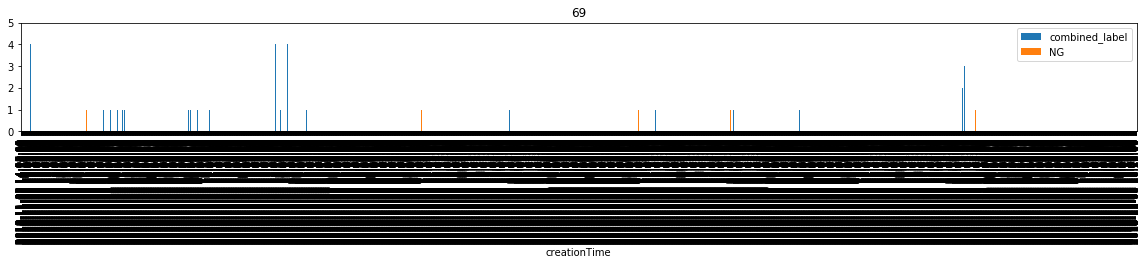

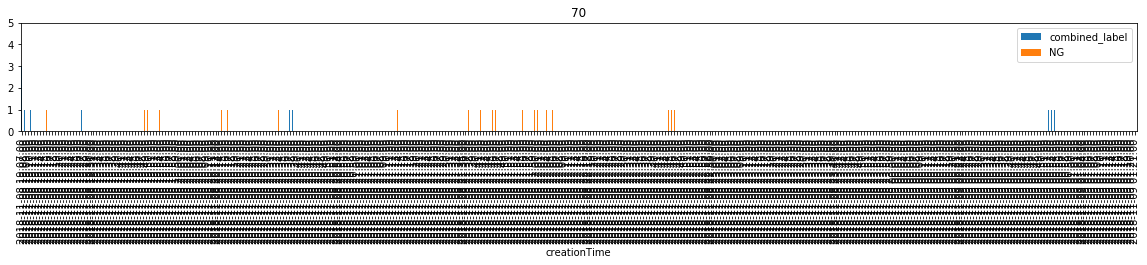

In [6]:
#### 매우~~~ 오래걸림
for cy in np.unique(isee_machine.CycleNum):
    temp = isee_machine[isee_machine.CycleNum==cy][['combined_label', 'NG']]
    temp = temp.set_index(isee_machine[isee_machine.CycleNum==cy].creationTime)
    ts = temp['NG'].shift(-20)
    temp = pd.concat([temp['combined_label'], ts], axis=1)
    temp.plot(kind='bar', figsize=(20,2), ylim=(0,5), title=cy)   